# COMP4030 - Data Science and Machine Learning - Coursework 2
# Wrangling and preprocessing data

*Authors*: Rui Gao

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/var/folders/ty/bs90pggd1hs_d0kr3j88rt_r0000gn/T/ipykernel_3254/3670940892.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1.  Data Analysis-Importing the Dataset

In [461]:
df_labels = pd.read_csv('Training set labels.csv')
df_values = pd.read_csv('Training set values.csv')
df_merge = pd.merge(df_labels, df_values, on='id')

### 1.1 Exploring the dataset to find potential issues

It is usually good to print the Dataframe and it's summary stats just to have a general idea about it:

In [404]:
print(df_merge.shape)
df_merge

(59400, 41)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011/3/14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013/3/6,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013/2/25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013/1/28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011/7/13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013/5/3,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011/5/7,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011/4/11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011/3/8,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
df_merge.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [6]:
df_merge.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011/3/14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013/3/6,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013/2/25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013/1/28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011/7/13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In the above result, we can see there are many missing values, Like funder, installer, subvillage, public_meeting, scheme_management, scheme_name, and permit

Every missing value count:

In [8]:
 missingdata = df_merge.notnull()
 print (missingdata['funder'].value_counts())
 print (missingdata['installer'].value_counts())
 print (missingdata['subvillage'].value_counts())
 print (missingdata['public_meeting'].value_counts())
 print (missingdata['scheme_management'].value_counts())
 print (missingdata['scheme_name'].value_counts())
 print (missingdata['permit'].value_counts())

funder
True     55763
False     3637
Name: count, dtype: int64
installer
True     55745
False     3655
Name: count, dtype: int64
subvillage
True     59029
False      371
Name: count, dtype: int64
public_meeting
True     56066
False     3334
Name: count, dtype: int64
scheme_management
True     55522
False     3878
Name: count, dtype: int64
scheme_name
True     30590
False    28810
Name: count, dtype: int64
permit
True     56344
False     3056
Name: count, dtype: int64


In the above result, you can see that 3637 values are missing from the funder.

In [9]:
print(df_merge.isnull().sum() / df_merge.shape[0])

id                       0.000000
status_group             0.000000
amount_tsh               0.000000
date_recorded            0.000000
funder                   0.061229
gps_height               0.000000
installer                0.061532
longitude                0.000000
latitude                 0.000000
wpt_name                 0.000034
num_private              0.000000
basin                    0.000000
subvillage               0.006246
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           0.056128
recorded_by              0.000000
scheme_management        0.065286
scheme_name              0.485017
permit                   0.051448
construction_year        0.000000
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.000000
management_gro

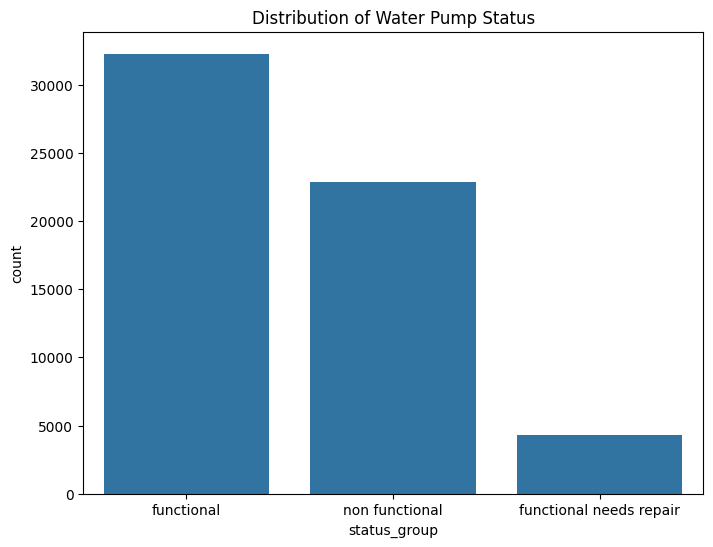

In [10]:
# 目标变量的分布
plt.figure(figsize=(8, 6))
sns.countplot(x='status_group', data=df_merge)
plt.title('Distribution of Water Pump Status')
plt.show()

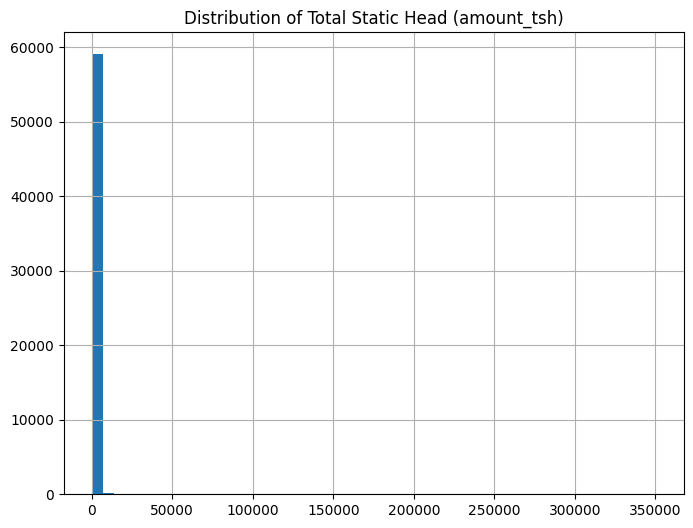

In [11]:
# 数值特征的分布
plt.figure(figsize=(8, 6))
df_merge['amount_tsh'].hist(bins=50)
plt.title('Distribution of Total Static Head (amount_tsh)')
plt.show()


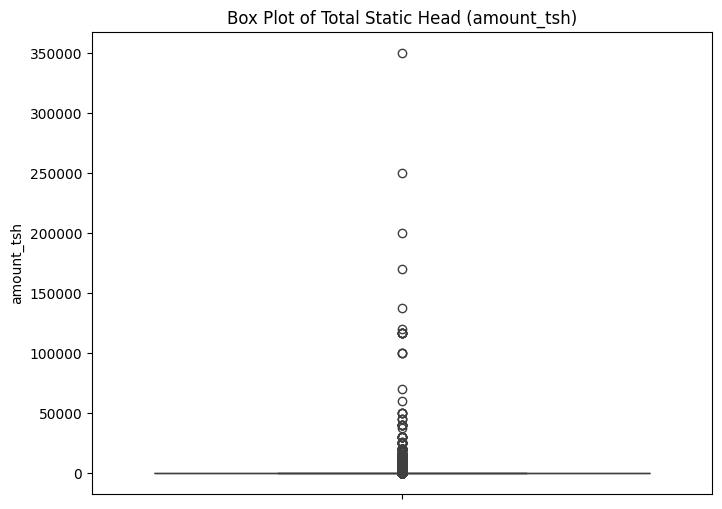

In [12]:
# 数值特征的箱形图
plt.figure(figsize=(8, 6))
sns.boxplot(y='amount_tsh', data=df_merge)
plt.title('Box Plot of Total Static Head (amount_tsh)')
plt.show()

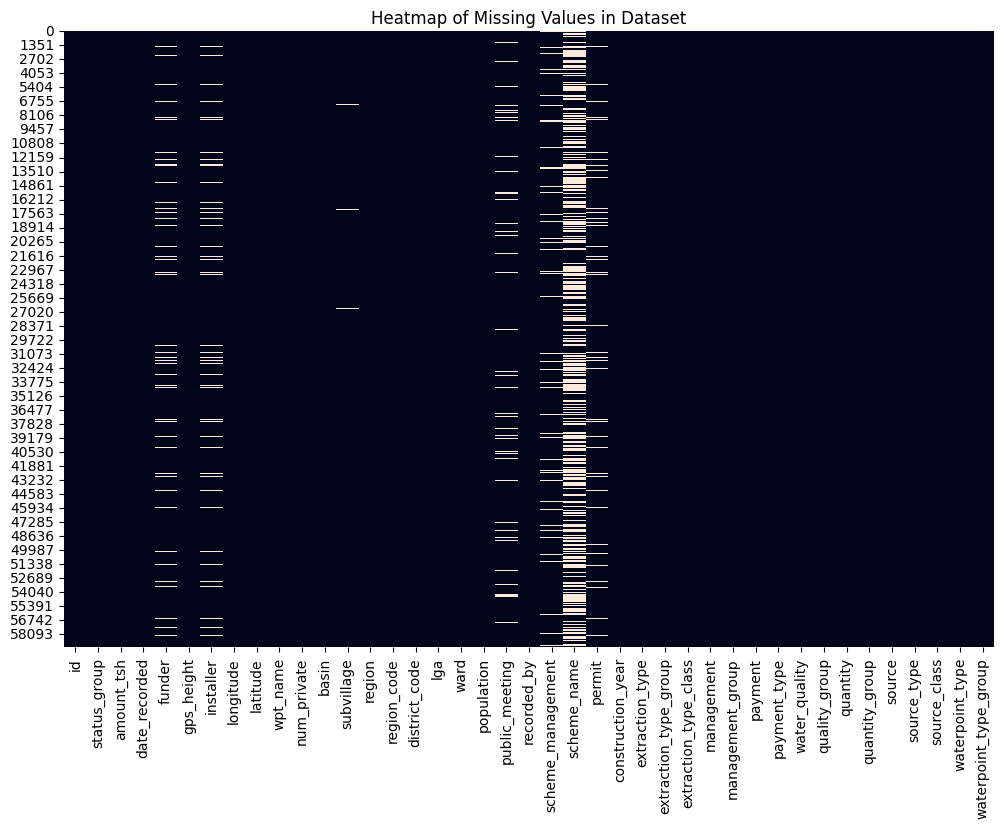

In [13]:
# 缺失值的热图
plt.figure(figsize=(12, 8))
sns.heatmap(df_merge.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in Dataset')
plt.show()

<Axes: >

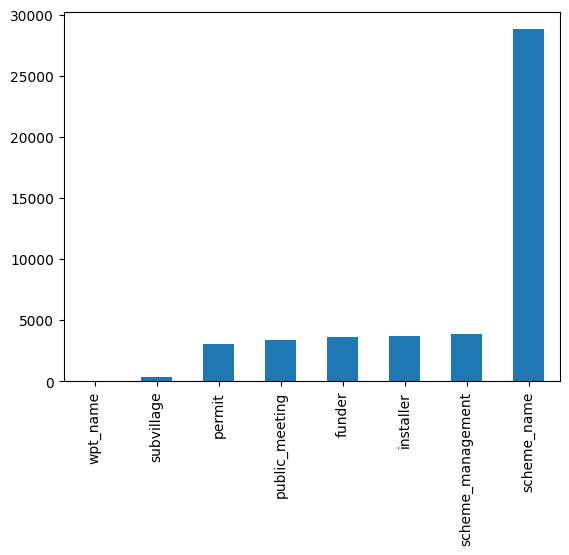

In [14]:
missing = df_merge.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

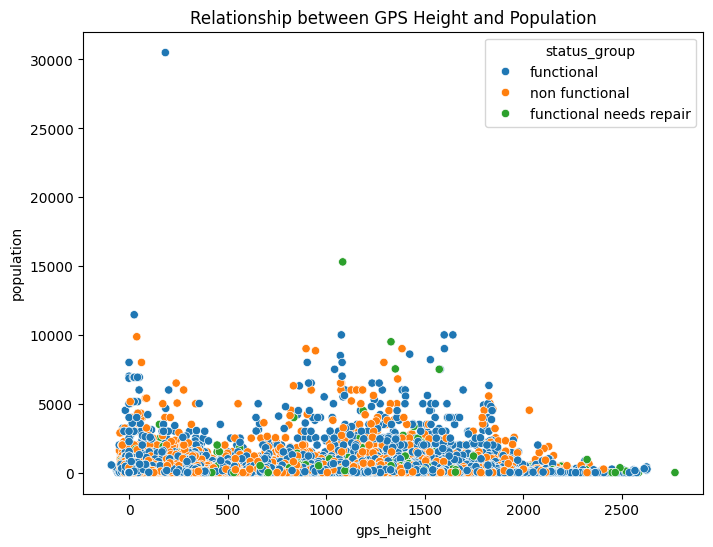

In [15]:
# 散点图查看数值特征之间的关系（示例）
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gps_height', y='population', hue='status_group', data=df_merge)
plt.title('Relationship between GPS Height and Population')
plt.show()

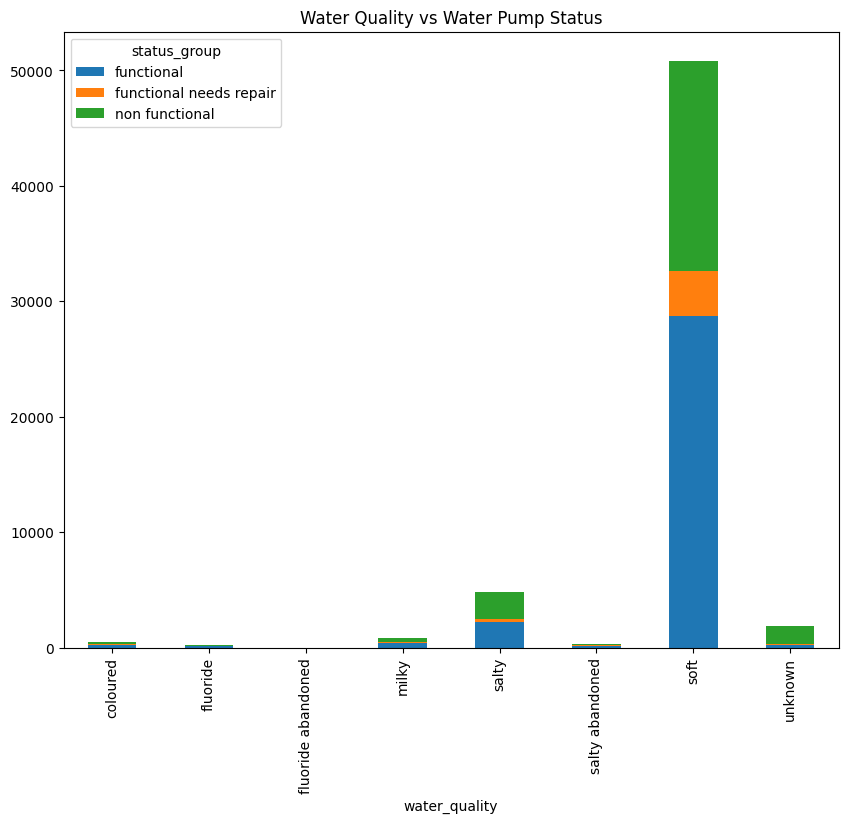

In [16]:
# 类别特征和目标变量的关系（示例）
pd.crosstab(df_merge['water_quality'], df_merge['status_group']).plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Water Quality vs Water Pump Status')
plt.show()

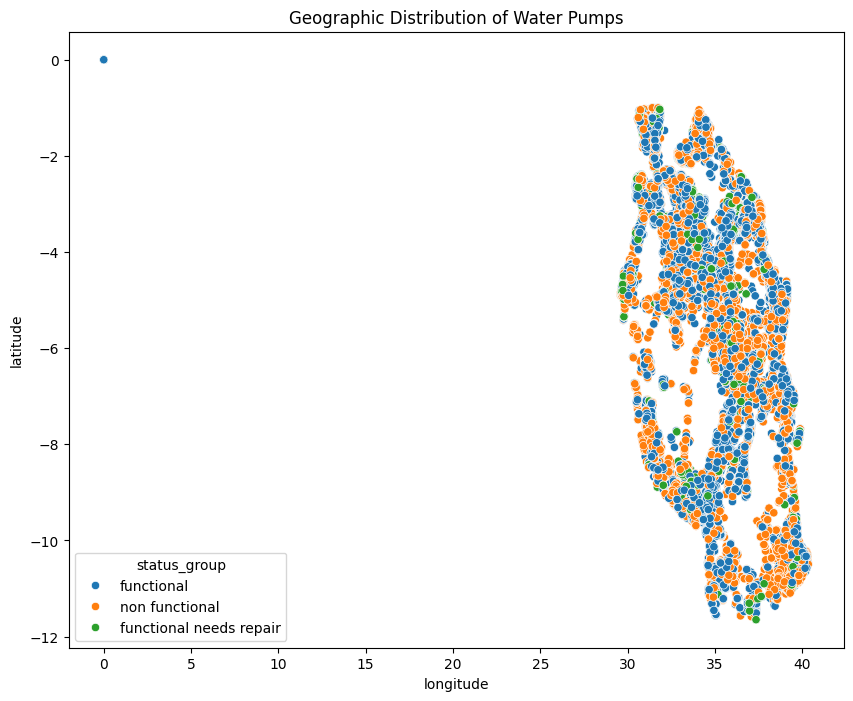

In [17]:
# 地理数据的可视化（如果适用）
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df_merge)
plt.title('Geographic Distribution of Water Pumps')
plt.show()

In [18]:
# Variable correlation analysis ---  Chi-square方法
# Classes use a chi-square test to evaluate the relationship between them:
crosstab1 = pd.crosstab(df_merge['extraction_type'], df_merge['extraction_type_group'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['extraction_type'], df_merge['extraction_type_class'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)

crosstab3 = pd.crosstab(df_merge['extraction_type_group'], df_merge['extraction_type_class'])
chi2_val3, p_val3, dof3, expected3 = chi2_contingency(crosstab3)

print(f'Chi-square value for extraction_type and extraction_type_group: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for extraction_type and extraction_type_class: {chi2_val2}, p-value: {p_val2}')
print(f'Chi-square value for extraction_type_group and extraction_type_class: {chi2_val3}, p-value: {p_val3}')


Chi-square value for extraction_type and extraction_type_group: 712800.0, p-value: 0.0
Chi-square value for extraction_type and extraction_type_class: 356400.00000000006, p-value: 0.0
Chi-square value for extraction_type_group and extraction_type_class: 356400.0, p-value: 0.0


In [19]:
# Variable correlation analysis ---   Cramér's V and mutual information
import pandas as pd
from sklearn.metrics import mutual_info_score
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# Calculating Cramér's V for each pair
cramers_v_1_2 = cramers_v(df_merge['extraction_type'], df_merge['extraction_type_group'])
cramers_v_1_3 = cramers_v(df_merge['extraction_type'], df_merge['extraction_type_class'])
cramers_v_2_3 = cramers_v(df_merge['extraction_type_group'], df_merge['extraction_type_class'])

# Calculating Mutual Information for each pair
mi_1_2 = mutual_info_score(df_merge['extraction_type'], df_merge['extraction_type_group'])
mi_1_3 = mutual_info_score(df_merge['extraction_type'], df_merge['extraction_type_class'])
mi_2_3 = mutual_info_score(df_merge['extraction_type_group'], df_merge['extraction_type_class'])

cramers_v_1_2, cramers_v_1_3, cramers_v_2_3, mi_1_2, mi_1_3, mi_2_3



(0.9999579023587122,
 0.9999073922064348,
 0.9999494877212747,
 1.7642537372917073,
 1.3905402978112098,
 1.3905402978112094)

In [20]:
# Variable correlation analysis ---  Cramér's V and mutual information
# Calculating Cramér's V for status_group with each pair
cramers_v_0_1 = cramers_v(df_merge['status_group'], df_merge['extraction_type'])
cramers_v_0_2 = cramers_v(df_merge['status_group'], df_merge['extraction_type_group'])
cramers_v_0_3 = cramers_v(df_merge['status_group'], df_merge['extraction_type_class'])

# Calculating Mutual Information for status_group with each pair
mi_0_1 = mutual_info_score(df_merge['status_group'], df_merge['extraction_type'])
mi_0_2 = mutual_info_score(df_merge['status_group'], df_merge['extraction_type_group'])
mi_0_3 = mutual_info_score(df_merge['status_group'], df_merge['extraction_type_class'])

cramers_v_0_1,cramers_v_0_2,cramers_v_0_3,mi_0_1,mi_0_2,mi_0_3

(0.24842745816693432,
 0.24690148970779824,
 0.2413387608217543,
 0.06252892926045191,
 0.06161803824907059,
 0.058307996642754274)

In [21]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# management VS management_group
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['management'], df_merge['management_group']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['management'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['management_group'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and management: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and management_group: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 237600.00000000003, p-value: 0.0
Chi-square value for status_group and management: 2081.1263983553317, p-value: 0.0
Chi-square value for status_group and management_group: 287.6515778358079, p-value: 1.7446261385259768e-57


In [22]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# payment VS payment_type
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['payment'], df_merge['payment_type']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['payment'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['payment_type'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and payment: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and payment_type: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 356400.0, p-value: 0.0
Chi-square value for status_group and payment: 3965.619403974787, p-value: 0.0
Chi-square value for status_group and payment_type: 3965.619403974787, p-value: 0.0


In [23]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# water_quality VS quality_group
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['water_quality'], df_merge['quality_group']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['water_quality'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['quality_group'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and water_quality: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and quality_group: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 296999.99999999994, p-value: 0.0
Chi-square value for status_group and water_quality: 2277.37334278519, p-value: 0.0
Chi-square value for status_group and quality_group: 2100.1365875688944, p-value: 0.0


In [24]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# quantity VS quantity_group   --- in full accord
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['quantity'], df_merge['quantity_group']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['quantity'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['quantity_group'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and quantity: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and quantity_group: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 237600.0, p-value: 0.0
Chi-square value for status_group and quantity: 11360.76789585276, p-value: 0.0
Chi-square value for status_group and quantity_group: 11360.76789585276, p-value: 0.0


In [25]:
# Variable correlation analysis ---  Cramér's V and Mutual Information
# source VS source_type VS source_class  

# Calculating Cramér's V for status_group with each pair
cramers_v_0_1 = cramers_v(df_merge['status_group'], df_merge['source'])
cramers_v_0_2 = cramers_v(df_merge['status_group'], df_merge['source_type'])
cramers_v_0_3 = cramers_v(df_merge['status_group'], df_merge['source_class'])

# Calculating Mutual Information for status_group with each pair
mi_0_1 = mutual_info_score(df_merge['status_group'], df_merge['source'])
mi_0_2 = mutual_info_score(df_merge['status_group'], df_merge['source_type'])
mi_0_3 = mutual_info_score(df_merge['status_group'], df_merge['source_class'])

cramers_v_0_1,cramers_v_0_2,cramers_v_0_3,mi_0_1,mi_0_2,mi_0_3

(0.14811059560973563,
 0.12629334316907617,
 0.07024985234472723,
 0.021771141289430064,
 0.015784519183330903,
 0.004588903268683877)

In [26]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# waterpoint_type VS waterpoint_type_group
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['waterpoint_type'], df_merge['waterpoint_type_group']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['waterpoint_type'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['waterpoint_type_group'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and waterpoint_type: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and waterpoint_type_group: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 297000.0, p-value: 0.0
Chi-square value for status_group and waterpoint_type: 7450.3165966082925, p-value: 0.0
Chi-square value for status_group and waterpoint_type_group: 6114.774218320655, p-value: 0.0


In [27]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# subvillage VS region
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['subvillage'], df_merge['region']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['subvillage'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['region'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and subvillage: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and region: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 918374.6802467487, p-value: 0.0
Chi-square value for status_group and subvillage: 55053.43788477525, p-value: 0.0
Chi-square value for status_group and region: 4794.631126187152, p-value: 0.0


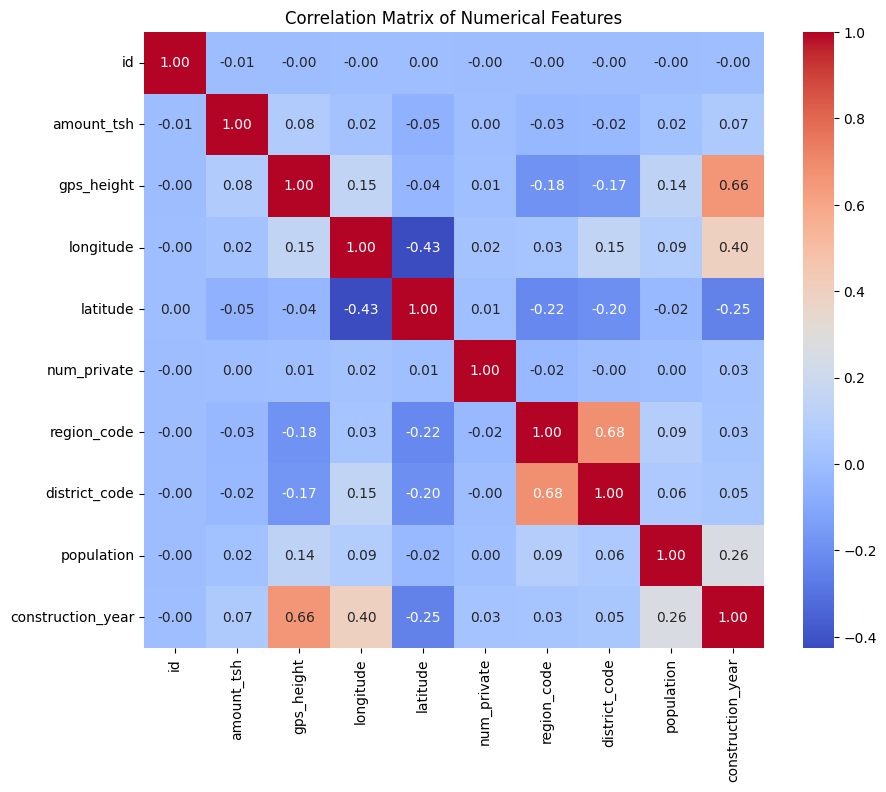

In [28]:
# Variable correlation analysis ---  Pearson's correlation coefficient

# Classes use a chi-square test to evaluate the relationship between them: 
# region_code VS district_code

# 计算相关系数矩阵
corr_matrix = df_merge.select_dtypes(include=[np.number]).corr()

# 使用热图可视化相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [29]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# region_code VS district_code
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['region_code'], df_merge['district_code']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['region_code'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['district_code'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and region_code: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and district_code: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 198723.67039754082, p-value: 0.0
Chi-square value for status_group and region_code: 5157.385233360806, p-value: 0.0
Chi-square value for status_group and district_code: 1673.5212765812196, p-value: 0.0


In [30]:
# Variable correlation analysis ---  Cramér's V and Mutual Information
# region_code VS district_code
# Calculating Cramér's V for each pair
cramers_v_1_2_g = cramers_v(df_merge['region_code'], df_merge['district_code'])
cramers_v_0_1_g = cramers_v(df_merge['status_group'], df_merge['region_code'])
cramers_v_0_2_g = cramers_v(df_merge['status_group'], df_merge['district_code'])

# Calculating Mutual Information for each pair
mi_1_2_g = mutual_info_score(df_merge['region_code'], df_merge['district_code'])
mi_0_1_g = mutual_info_score(df_merge['status_group'], df_merge['region_code'])
mi_0_2_g = mutual_info_score(df_merge['status_group'], df_merge['district_code'])

cramers_v_1_2_g, cramers_v_0_1_g, cramers_v_0_2_g, mi_1_2_g, mi_0_1_g, mi_0_2_g

(0.4191637986775438,
 0.20730668787401582,
 0.11733487242362048,
 0.6116799580100188,
 0.0437607181411399,
 0.014263555644974356)

In [31]:
# 使用随机森林模型检查变量的重要性
# region_code， district_code VS status_group

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# 目标变量是分类的，需要将其编码为数值
le = LabelEncoder()
y = le.fit_transform(df_merge['status_group'])

# 选择数值型特征
X = df_merge[['region_code', 'district_code']]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 获取特征重要性
importances = rf.feature_importances_
print({feature: importance for feature, importance in zip(['region_code', 'district_code'], importances)})


{'region_code': 0.685308109420227, 'district_code': 0.31469189057977304}


In [32]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# region VS region_code
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['region_code'], df_merge['region']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['region_code'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['region'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and region_code: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and region: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 1183598.9963597015, p-value: 0.0
Chi-square value for status_group and region_code: 5157.385233360806, p-value: 0.0
Chi-square value for status_group and region: 4794.631126187152, p-value: 0.0


In [33]:
# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# lga VS ward
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['lga'], df_merge['ward']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['lga'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['ward'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and lga: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and ward: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 7085105.494439563, p-value: 0.0
Chi-square value for status_group and lga: 11529.910639111982, p-value: 0.0
Chi-square value for status_group and ward: 26144.961184839798, p-value: 0.0


In [34]:
# 使用随机森林模型检查变量的相关性
# lga VS ward

# 复制原始数据集，保证数据集的唯一性
df_merge_copy = df_merge.copy()

# 将分类目标变量编码为整数
le = LabelEncoder()
df_merge_copy['status_group_encoded'] = le.fit_transform(df_merge_copy['status_group'])


# 将lga和ward转换为数值特征，因为随机森林不能直接处理字符串类型的特征
lga_encoded = LabelEncoder().fit_transform(df_merge_copy['lga'])
ward_encoded = LabelEncoder().fit_transform(df_merge_copy['ward'])

# 创建特征矩阵X和目标y
X = pd.DataFrame({'lga_encoded': lga_encoded, 'ward_encoded': ward_encoded})
y = df_merge_copy['status_group_encoded']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 获取并打印特征重要性
feature_importances = rf.feature_importances_
print({feature: importance for feature, importance in zip(X.columns, feature_importances)})


{'lga_encoded': 0.42324886643281207, 'ward_encoded': 0.5767511335671879}


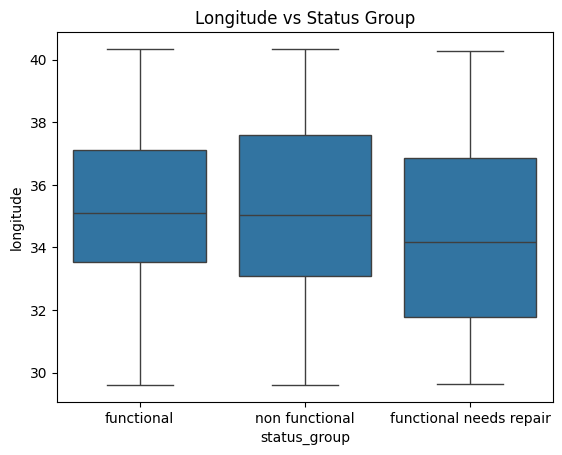

In [35]:
# Visualize the relationship between longitude and status group

# Delete the row where longitude is 0
df_filtered_longitude = df_merge[df_merge['longitude'] != 0]

sns.boxplot(x='status_group', y='longitude', data=df_filtered_longitude)
plt.title('Longitude vs Status Group')
plt.show()

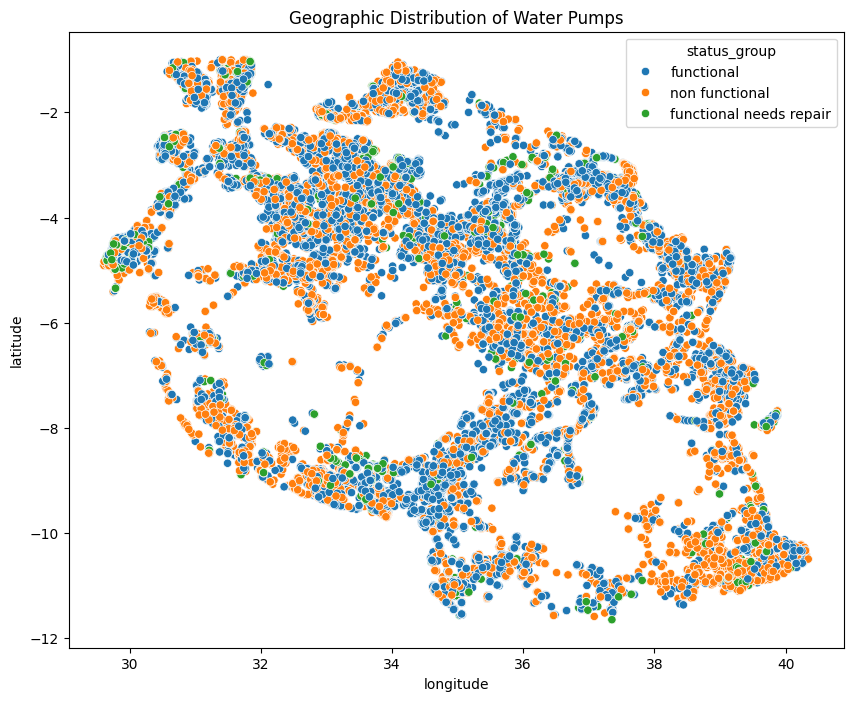

In [36]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df_filtered_longitude)
plt.title('Geographic Distribution of Water Pumps')
plt.show()

In [37]:
# 使用随机森林模型检查变量的重要性
# longitude， latitude VS status_group

# 目标变量是分类的，需要将其编码为数值
le = LabelEncoder()
y = le.fit_transform(df_filtered_longitude['status_group'])

# 选择数值型特征
X = df_filtered_longitude[['longitude', 'latitude']]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 获取特征重要性
importances = rf.feature_importances_
print({feature: importance for feature, importance in zip(['longitude', 'latitude'], importances)})

{'longitude': 0.4988177007713602, 'latitude': 0.5011822992286399}


In [38]:
# funder、installer correlation detection:

# Variable correlation analysis ---  Chi-square
# Classes use a chi-square test to evaluate the relationship between them: 
# funder VS installer
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_merge['funder'], df_merge['installer']))
print(f'Chi-square statistic: {chi2}, p-value: {p}')

crosstab1 = pd.crosstab(df_merge['status_group'], df_merge['funder'])
chi2_val1, p_val1, dof1, expected1 = chi2_contingency(crosstab1)

crosstab2 = pd.crosstab(df_merge['status_group'], df_merge['installer'])
chi2_val2, p_val2, dof2, expected2 = chi2_contingency(crosstab2)


print(f'Chi-square value for status_group and funder: {chi2_val1}, p-value: {p_val1}')
print(f'Chi-square value for status_group and installer: {chi2_val2}, p-value: {p_val2}')

Chi-square statistic: 61456333.58723932, p-value: 0.0
Chi-square value for status_group and funder: 14172.892996127426, p-value: 0.0
Chi-square value for status_group and installer: 14722.564833858818, p-value: 0.0


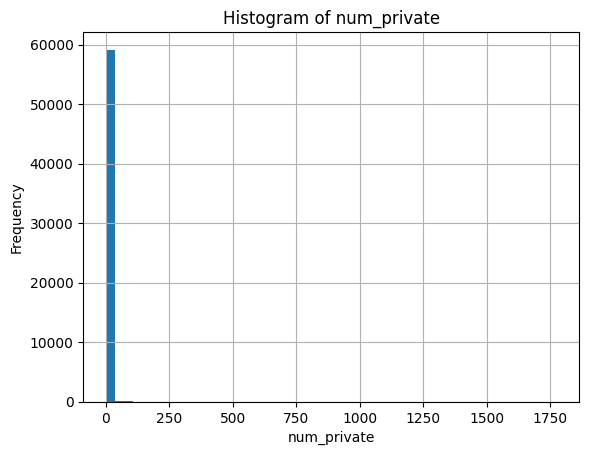

In [39]:
# num_private 数据特征分析

# 绘制num_private的直方图
df_merge['num_private'].hist(bins=50)
plt.xlabel('num_private')
plt.ylabel('Frequency')
plt.title('Histogram of num_private')
plt.show()

Model evaluation ---- Cross-validation

Predictive performance evaluation: By including num_private in model training and evaluating its impact on model performance. Cross-validation can be used to accurately evaluate model performance with and without num_private features.
    
The visualization is as follows：
    
    

In [40]:
# Model evaluation ---- Cross-validation
# X_with_num_private 和 X_without_num_private分别代表包含和不包含num_private特征的特征矩阵
# y是目标变量
# TODO需要在数据清理及预处理完成后再验证！！否则数据特征不准确

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# 选择模型和评估指标
model = RandomForestClassifier()
metric = 'accuracy'

# 首先，确保目标变量是数值型
le = LabelEncoder()
y = le.fit_transform(df_merge['status_group'])

# 接下来，从 df_merge 中选择特征列
# 假设除了 'num_private' 和 'status_group'，其他列都是特征
X = df_merge.drop(['num_private', 'status_group'], axis=1)

# 如果其他列包含非数值型数据，需要将它们转换为数值型（例如使用LabelEncoder或OneHotEncoder）

# 计算包含 'num_private' 特征时的准确性
scores_with = cross_val_score(model, X, y, cv=5, scoring=metric)

# 计算不包含 'num_private' 特征时的准确性
# 这里我们不需要再次调用 drop 方法，因为 'num_private' 已经在 X 中被去除
X_without_num_private = X.drop('num_private_exists', axis=1)
scores_without = cross_val_score(model, X_without_num_private, y, cv=5, scoring=metric)

print(f"Accuracy with num_private: {scores_with.mean()}")
print(f"Accuracy without num_private: {scores_without.mean()}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/core/generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2013/2/25'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/core/generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2011/3/14'


In [41]:
# 使用随机森林模型检查变量的重要性
# num_private VS status_group


# 目标变量是分类的，需要将其编码为数值
le = LabelEncoder()
y = le.fit_transform(df_merge['status_group'])

# 选择数值型特征
X = df_merge[['num_private']]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 获取特征重要性
importances = rf.feature_importances_
print({feature: importance for feature, importance in zip(['num_private'], importances)})


{'num_private': 1.0}


Describe can also be used on *Series* object that are not numerical such as the *basin* categorical column:

In [42]:
df_merge['basin'].describe()

count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object

We can also print the unique values for a categorical column (this could be useful for picking up on typos):

In [43]:
df_merge['basin'].unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

In [44]:
df_merge['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

## 2. Data Preprocessing

According to the above data analysis, data preprocessing is carried out


In [462]:
# 在进行数据预处理前先确保数据集是否是原始数据，并创建备份

# 创建原始数据的备份
df_backup = df_merge.copy(deep=True)

print(df_merge.shape)
print(df_backup.shape)

df_merge.head()


(59400, 41)
(59400, 41)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011/3/14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013/3/6,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013/2/25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013/1/28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011/7/13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### 2.1 Delete unnecessary data

To sum up, data features that need to be deleted before model prediction analysis are as follows:

extraction_type_group、extraction_type_class、scheme_name、recorded_by、wpt_name、
num_private、management、payment、quality_group、quantity_group、source_class、source_type、waterpoint_type_group、region、subvillage 、lga、funder、installer

In [463]:
# Delete some unnecessary data

features_to_drop = ['extraction_type_group', 'extraction_type_class', 'scheme_name', 'recorded_by', 'wpt_name', 'num_private', 'management', 'payment', 'quality_group', 'quantity_group', 'source_class', 'source_type', 'waterpoint_type_group', 'region', 'subvillage', 'lga']
df_merge_clean = df_merge.drop(features_to_drop, axis=1)


# 删除数据后保存备份
# 将DataFrame保存到CSV文件
df_merge_clean.to_csv('Backup/deleted_data.csv', index=False)

print(df_merge.shape)
print(df_merge_clean.shape)
df_merge_clean.head()
# df_merge.head()




(59400, 41)
(59400, 25)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,...,scheme_management,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,waterpoint_type
0,69572,functional,6000.0,2011/3/14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,...,VWC,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe
1,8776,functional,0.0,2013/3/6,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,...,Other,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,34310,functional,25.0,2013/2/25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,...,VWC,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple
3,67743,non functional,0.0,2013/1/28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,...,VWC,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple
4,19728,functional,0.0,2011/7/13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,...,NaN,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


### 2.2 Dealing with missing data

Deal with missing values first, then outliers. Evaluating outliers in the presence of missing data can be misleading because missing values may hide potential outliers, or methods to fill in missing values may introduce outliers.


Before processing the missing value, the relationship between the current feature and other features is analyzed, and then the specific filling scheme is selected.


The current missing values mainly include:

* funder, installer, subvillage, public_meeting, scheme_management, scheme_name, and permit.

Missing values that need to be prosessed after the above analysis include：

* scheme_management
* public_meeting
* permit
* source：(unknow is considered a missing value, although it is not detected.)
  * source's other + source's unknow = 278 = source_type's other
* funder
* installer

Can't prosess:
* water_quality      3.1%
* payment_type       13.7%
* quantity           1.3% 
* management_group   0.9%




#### 先处理日期型、布尔型数据


In [464]:
# 日期型特征处理

# 将date_recorded列转换为datetime类型
df_merge_clean['date_recorded'] = pd.to_datetime(df_merge_clean['date_recorded'], format='%Y/%m/%d')

# 提取年、月、日和星期几
df_merge_clean['date_recorded_year'] = df_merge_clean['date_recorded'].dt.year
df_merge_clean['date_recorded_month'] = df_merge_clean['date_recorded'].dt.month
df_merge_clean['date_recorded_day'] = df_merge_clean['date_recorded'].dt.day
df_merge_clean['date_recorded_weekday'] = df_merge_clean['date_recorded'].dt.weekday


# 对于布尔型特征的处理：
# df_merge_clean['public_meeting'] = df_merge_clean['public_meeting'].astype(int)
# df_merge_clean['permit'] = df_merge_clean['permit'].astype(int)


# test result
df_merge_clean.head()



,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,...,management_group,payment_type,water_quality,quantity,source,waterpoint_type,date_recorded_year,date_recorded_month,date_recorded_day,date_recorded_weekday
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,...,user-group,annually,soft,enough,spring,communal standpipe,2011,3,14,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,...,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,2013,3,6,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,...,user-group,per bucket,soft,enough,dam,communal standpipe multiple,2013,2,25,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,...,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2013,1,28,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2011,7,13,2


#### 特征相关性检验：

对比类别特征和数值特征之间的关系时需要将类别特征编码为数值型再进行比较。方法有One-hot编码与LabelEncoder编码。

* One-hot编码与LabelEncoder的区别
One-hot编码：为每个类别的每个唯一值创建一个新列。适用于分类算法中，尤其是那些不以类别值的相对大小作为前提的算法。但是，这会导致特征空间的维度急剧增加，特别是当原始数据中的类别特征有许多唯一值时。

LabelEncoder：将类别标签转换为0到n_classes-1之间的整数。这种方法不会增加特征空间的维度，但它引入了一个潜在的问题，即将原本没有大小或顺序意义的类别值转换为有序的数值，这可能会误导一些模型（如线性模型或神经网络），让它们错误地解释这些数字之间存在某种顺序或大小关系。


对DataFrame中的所有类别特征进行One-hot编码，可以通过计算相关系数矩阵来探索特征之间的相关性。对处理后的DataFrame计算相关系数矩阵，并使用热图进行可视化

* 计算相关系数矩阵来探索特征之间的相关性

In [466]:
print(df_merge.shape)
print(df_merge_clean.shape)
df_merge_clean.head()

(59400, 41)
(59400, 29)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,...,management_group,payment_type,water_quality,quantity,source,waterpoint_type,date_recorded_year,date_recorded_month,date_recorded_day,date_recorded_weekday
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,...,user-group,annually,soft,enough,spring,communal standpipe,2011,3,14,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,...,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,2013,3,6,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,...,user-group,per bucket,soft,enough,dam,communal standpipe multiple,2013,2,25,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,...,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2013,1,28,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2011,7,13,2


#### 2.2.1 scheme_management
Processing scheme_management data feature missing values.

Before processing the missing value, the relationship between the current feature and other features is analyzed, and then the specific filling scheme is selected.


### 方法一：chi-square test

* Use chi-square 

* Use the dropna() method to exclude missing values in scheme_management to ensure the validity of chi-square tests.

In [467]:
from scipy.stats import chi2_contingency

# 首先筛选出分类特征
categorical_features = df_merge_clean.select_dtypes(include=['object']).columns

# 对于每个分类特征，使用卡方检验来评估与scheme_management之间的相关性
for feature in categorical_features:
    if feature != 'scheme_management':
        contingency_table = pd.crosstab(df_merge_clean['scheme_management'].dropna(), df_merge_clean[feature])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Feature: {feature}, chi-squared statistic: {chi2},  P-value: {p}, dof: {dof}")


Feature: status_group, chi-squared statistic: 1886.2048212704153,  P-value: 0.0, dof: 20
Feature: funder, chi-squared statistic: 198509.7631194687,  P-value: 0.0, dof: 17490
Feature: installer, chi-squared statistic: 215902.04258172767,  P-value: 0.0, dof: 20020
Feature: basin, chi-squared statistic: 25695.858644657263,  P-value: 0.0, dof: 80
Feature: ward, chi-squared statistic: 322738.32342586253,  P-value: 0.0, dof: 20160
Feature: public_meeting, chi-squared statistic: 3787.0156964694047,  P-value: 0.0, dof: 10
Feature: permit, chi-squared statistic: 4504.108845540524,  P-value: 0.0, dof: 10
Feature: extraction_type, chi-squared statistic: 20629.863703819385,  P-value: 0.0, dof: 170
Feature: management_group, chi-squared statistic: 108876.59910029075,  P-value: 0.0, dof: 40
Feature: payment_type, chi-squared statistic: 13734.15290577312,  P-value: 0.0, dof: 60
Feature: water_quality, chi-squared statistic: 2894.031745337765,  P-value: 0.0, dof: 70
Feature: quantity, chi-squared stat

When all p-values are 0, this indicates that there is a statistically significant relationship between each examined feature and scheme_management. In this case, the p-value does not directly help us determine which feature is most relevant to scheme_management, because the size of the p-value is mainly used to determine whether the correlation exists, not to measure the strength of the correlation.

ward、installer和funder与scheme_management有最强的关联性，理论上可以基于这些变量来填充scheme_management的缺失值。



### 方法二：Cramer's V statistic test

In [468]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 计算每个特征与scheme_management的Cramér's V值
cramers_v_values = {}
for feature in categorical_features:
    if feature != 'scheme_management' and feature in df_merge_clean.columns:
        cramers_v_values[feature] = cramers_v(df_merge_clean[feature], df_merge_clean['scheme_management'])

# 打印Cramér's V值，按降序排列
sorted_cramers_v = sorted(cramers_v_values.items(), key=lambda item: item[1], reverse=True)
for feature, v in sorted_cramers_v:
    print(f"Feature: {feature}, Cramér's V: {v}")


Feature: ward, Cramér's V: 0.7382869790205138
Feature: management_group, Cramér's V: 0.7000685668130384
Feature: installer, Cramér's V: 0.6142515676422288
Feature: funder, Cramér's V: 0.5904607974259927
Feature: permit, Cramér's V: 0.2925615963792985
Feature: public_meeting, Cramér's V: 0.267964574821969
Feature: basin, Cramér's V: 0.2401641576450921
Feature: source, Cramér's V: 0.2242734107273044
Feature: payment_type, Cramér's V: 0.20261215253389248
Feature: extraction_type, Cramér's V: 0.1919808450979579
Feature: waterpoint_type, Cramér's V: 0.17111116211898933
Feature: quantity, Cramér's V: 0.14849179371635385
Feature: status_group, Cramér's V: 0.12964025756684971
Feature: water_quality, Cramér's V: 0.08524727369458301


ward 和 management_group 的 Cramér's V 值最高，分别为 0.738 和 0.700，表明这两个特征与 scheme_management 之间有很强的关联性。这意味着 ward 或 management_group 的信息可能对预测或填充 scheme_management 的缺失值特别有用。

综合以上分析，可以基于关联性最强的特征填充缺失值，可以先使用基于ward的分组来填充scheme_management的缺失值，因为ward没有缺失值，并且与scheme_management有很强的关联性。这种方法的优点是它利用了数据内在的结构信息，可能比简单的全局填充（如使用整个数据集的众数）提供更准确的填充值。



首先，计算每个ward对应的scheme_management的最常见值：对于每个ward，我们找出其中scheme_management的众数（即最常见的值）。

In [469]:
# 步骤1:  填充scheme_management列中的空白数据为"Unknown"
df_merge_clean['scheme_management'] = df_merge_clean['scheme_management'].fillna('Unknown')

# 确保其他表示缺失的标记（如空字符串）也被替换为"Unknown"
df_merge_clean['scheme_management'] = df_merge_clean['scheme_management'].replace('', 'Unknown')

# 验证填充结果
# df_merge_clean.head(100)
print(df_merge_clean['scheme_management'].value_counts())
print("Number of missing values:", df_merge_clean['scheme_management'].isna().sum())

scheme_management
VWC                 36793
WUG                  5206
Unknown              3878
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64
Number of missing values: 0


In [470]:
# 步骤2: 计算每个ward对应的scheme_management的最常见值
# 这里使用transform和mode来直接计算每个组的众数
mode_per_category = df_merge_clean.groupby('ward')['scheme_management'].agg(lambda x: pd.Series.mode(x)[0] if not x.mode().empty else "Unknown")


填充缺失值：对于scheme_management的每个缺失值，我们用对应ward的scheme_management众数来填充。

In [471]:
# 步骤3: 对于scheme_management为"Unknown"的记录，用对应ward的众数进行填充

# 遍历每个ward
for ward, mode in mode_per_category.items():
    # 对每个ward的scheme_management进行填充
    df_merge_clean.loc[(df_merge_clean['ward'] == ward) & (df_merge_clean['scheme_management'] == "Unknown"), 'scheme_management'] = mode

# 步骤4: 验证填充结果
print(df_merge_clean['scheme_management'].value_counts())
print("缺失值数量:", df_merge_clean['scheme_management'].isna().sum())


scheme_management
VWC                 37449
WUG                  5315
Water authority      3179
Unknown              2925
WUA                  2921
Water Board          2815
Parastatal           1688
Company              1086
Private operator     1069
Other                 784
SWC                    97
Trust                  72
Name: count, dtype: int64
缺失值数量: 0


由于与status_group没有很强的关联性，所以暂时把剩余的unknown单独当作一类，后期再进行验证。

根据以上分析结果，对比两者方法：
* 卡方检验的p-value可以用来判断变量间是否存在关联，但不告诉我们关联有多强。
* Cramér's V提供了一个关于关联强度的实际量化指标。

结论：在实际应用中，使用Cramér's V通常更有帮助，因为它提供了一个直观的关联强度度量，可以帮助我们决定在模型中保留哪些特征或如何处理特征。特别是在变量类别数目较多时，Cramér's V能够给出更为直观和可比较的关联强度信息。


### 方法三： Mutual Information test

互信息（Mutual Information, MI）可以衡量两个变量之间的共享信息量，无论这些变量是连续的还是离散的（类别的）。这意味着互信息不仅可以用于衡量类别特征与数值特征之间的关联性强度，也可以用来衡量两个类别特征之间的关联性强度。

使用Mutual Information衡量两个变量之间的相关性，互信息越大，一个变量包含关于另一个变量的信息就越多，从而意味着它们之间的相关性越强。



In [472]:
from sklearn.feature_selection import mutual_info_regression

# 目标是计算这个类别特征与所有数值特征之间的互信息

df_merge_clean_copy = df_merge_clean.copy(deep=True)

# 首先，将类别特征转换为数值
df_merge_clean_copy['scheme_management_encoded'] = df_merge_clean_copy['scheme_management'].astype('category').cat.codes

# 初始化一个空的字典来存储每个数值特征与类别特征之间的互信息
mutual_info_scores = {}

# 对于DataFrame中的每个数值特征，计算它与类别特征之间的互信息
for col in df_merge_clean_copy.select_dtypes(include=[np.number]).columns:
    # 计算互信息，注意需要将数据转换为非NaN的数组
    mi = mutual_info_regression(df_merge_clean_copy[[col]].dropna(), df_merge_clean_copy.dropna(subset=[col])['scheme_management_encoded'])
    mutual_info_scores[col] = mi[0]

# 打印结果
for col, mi in mutual_info_scores.items():
    print(f"Mutual Information between 'scheme_management' and '{col}': {mi}")


Mutual Information between 'scheme_management' and 'id': 0.0008456484132306485
Mutual Information between 'scheme_management' and 'amount_tsh': 0.13694786070806053
Mutual Information between 'scheme_management' and 'gps_height': 0.19090612511943306
Mutual Information between 'scheme_management' and 'longitude': 0.5771428738391382
Mutual Information between 'scheme_management' and 'latitude': 0.5364899465810975
Mutual Information between 'scheme_management' and 'region_code': 0.511032054434513
Mutual Information between 'scheme_management' and 'district_code': 0.16333023233773059
Mutual Information between 'scheme_management' and 'population': 0.15960145103319245
Mutual Information between 'scheme_management' and 'construction_year': 0.13932161934846832
Mutual Information between 'scheme_management' and 'date_recorded_year': 0.1258917182479493
Mutual Information between 'scheme_management' and 'date_recorded_month': 0.11536943681147971
Mutual Information between 'scheme_management' and 

#### 2.2.2 source
Processing source data feature missing values.

source's other + source's unknow = 278 = source_type's other

In [473]:
# 将'source'列中的所有'unknown'值替换为'other'
df_merge_clean['source'] = df_merge_clean['source'].replace('unknown', 'other')

# 显示替换后的数据，以验证替换是否成功
print(df_merge_clean['source'].value_counts())

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     278
Name: count, dtype: int64


In [474]:
# 处理基本的缺失值以后，保存当前数据集
print(df_merge_clean.shape)
df_merge_clean.head()

# 将DataFrame保存到CSV文件
df_merge_clean.to_csv('Backup/after_essential_massing.csv', index=False)


(59400, 29)


#### 2.2.3 public_meeting
Processing public_meeting data feature missing values.

For public_meeting, missing values accounted for 5.6%, TRUE 85.8%, and FALSE 8.5%

In [475]:
df_merge_clean['public_meeting'].unique()

print(df_merge_clean['public_meeting'].value_counts(dropna=False))

public_meeting
True     51011
False     5055
NaN       3334
Name: count, dtype: int64


#### 填充方式——众数

由于True的占比相当高（85.8%），考虑用众数（这里是True）来填充缺失值

In [476]:

# 计算众数
most_common_value = df_merge_clean['public_meeting'].mode()[0]

# 填充缺失值
df_merge_clean['public_meeting'].fillna(most_common_value, inplace=True)

# 验证填充后的结果
print(df_merge_clean['public_meeting'].value_counts(dropna=False))


public_meeting
True     54345
False     5055
Name: count, dtype: int64


/var/folders/ty/bs90pggd1hs_d0kr3j88rt_r0000gn/T/ipykernel_3254/4215723278.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge_clean['public_meeting'].fillna(most_common_value, inplace=True)
/var/folders/ty/bs90pggd1hs_d0kr3j88rt_r0000gn/T/ipykernel_3254/4215723278.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

#### 2.2.4 permit
Processing public_meeting data feature missing values.

For public_meeting, missing values accounted for 5.1%, TRUE 65.4%, and FALSE 29.4%

In [477]:
# 将DataFrame保存到CSV文件
df_merge_clean.to_csv('Backup/missing_permit_unfilled.csv', index=False)

print(df_merge_clean['permit'].value_counts(dropna=False))

permit
True     38852
False    17492
NaN       3056
Name: count, dtype: int64


#### 填充方式——与其他强烈相关的特征所对应的众数填充

In [478]:
# 转换permit为数值型  True转换为1，False转换为0
df_merge_clean['permit'] = LabelEncoder().fit_transform(df_merge_clean['permit'])

# 计算每个ward的permit众数
mode_per_ward = df_merge_clean.groupby('ward')['permit'].agg(lambda x: pd.Series.mode(x).iloc[0] if not x.mode().empty else np.nan)

# 创建一个字典，其键为ward，值为permit的众数
mode_dict = mode_per_ward.to_dict()

# 使用字典来填充permit缺失值
df_merge_clean['permit'] = df_merge_clean.apply(lambda row: mode_dict.get(row['ward'], 1) if row['permit'] == 2 else row['permit'], axis=1)


In [479]:
print(df_merge_clean['permit'].value_counts(dropna=False))

permit
1    39106
0    17522
2     2772
Name: count, dtype: int64


In [480]:
# 检查是否还有缺失值标记为2，并用全局众数1填充
df_merge_clean['permit'] = df_merge_clean['permit'].replace(2, 1)

# 确认所有的缺失值都已经被填充
print(df_merge_clean['permit'].value_counts(dropna=False))

permit
1    41878
0    17522
Name: count, dtype: int64


In [481]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 计算每个特征与permit的Cramér's V值
cramers_v_values = {}
for feature in categorical_features:
    if feature != 'permit' and feature in df_merge_clean.columns:
        cramers_v_values[feature] = cramers_v(df_merge_clean[feature], df_merge_clean['permit'])

# 打印Cramér's V值，按降序排列
sorted_cramers_v = sorted(cramers_v_values.items(), key=lambda item: item[1], reverse=True)
for feature, v in sorted_cramers_v:
    print(f"Feature: {feature}, Cramér's V: {v}")

Feature: ward, Cramér's V: 0.8738752237906056
Feature: installer, Cramér's V: 0.6117135286159165
Feature: funder, Cramér's V: 0.5911055851354686
Feature: scheme_management, Cramér's V: 0.30161803146103233
Feature: extraction_type, Cramér's V: 0.21084632842900156
Feature: source, Cramér's V: 0.2101188356995759
Feature: basin, Cramér's V: 0.17733450128302847
Feature: payment_type, Cramér's V: 0.17113531640690757
Feature: waterpoint_type, Cramér's V: 0.16347987825871066
Feature: water_quality, Cramér's V: 0.12751165825156943
Feature: public_meeting, Cramér's V: 0.11745977152366546
Feature: quantity, Cramér's V: 0.060638757655113215
Feature: management_group, Cramér's V: 0.04038900448894723
Feature: status_group, Cramér's V: 0.03327353445888984


In [482]:
from sklearn.feature_selection import mutual_info_regression

# 目标是计算这个类别特征与所有数值特征之间的互信息

df_merge_missing_copy = df_merge_clean.copy(deep=True)


# 初始化一个空的字典来存储每个数值特征与类别特征之间的互信息
mutual_info_scores = {}

# 对于DataFrame中的每个数值特征，计算它与类别特征之间的互信息
for col in df_merge_missing_copy.select_dtypes(include=[np.number]).columns:
    # 计算互信息，注意需要将数据转换为非NaN的数组
    mi = mutual_info_regression(df_merge_missing_copy[[col]].dropna(), df_merge_missing_copy.dropna(subset=[col])['permit'])
    mutual_info_scores[col] = mi[0]

# 打印结果
for col, mi in mutual_info_scores.items():
    print(f"Mutual Information between 'permit' and '{col}': {mi}")

Mutual Information between 'permit' and 'id': 0
Mutual Information between 'permit' and 'amount_tsh': 0.020632090101992517
Mutual Information between 'permit' and 'gps_height': 0.031324286280222324
Mutual Information between 'permit' and 'longitude': 0.13164229264143046
Mutual Information between 'permit' and 'latitude': 0.09956492703263287
Mutual Information between 'permit' and 'region_code': 0.10429085262320648
Mutual Information between 'permit' and 'district_code': 0.029192873215079906
Mutual Information between 'permit' and 'population': 0.020727948785303596
Mutual Information between 'permit' and 'permit': 0.6035974298216322
Mutual Information between 'permit' and 'construction_year': 0.013408249459353705
Mutual Information between 'permit' and 'date_recorded_year': 0.00013188124188090455
Mutual Information between 'permit' and 'date_recorded_month': 0.006145194737499082
Mutual Information between 'permit' and 'date_recorded_day': 0.0065985151374237105
Mutual Information between

#### 2.2.5 funder and installer

根据上面数据分析知道funder和installer之间有很强的相关联性，并且都与status_group显著相关，这意味着它们对于模型来说可能是有价值的特征。这种情况下，保留两者中的一个或合并这两个特征为一个新特征，可能是处理数据冗余的一种方式。

In [483]:

# 使用fillna方法替换空值，避免在组合时产生问题
df_merge_clean['funder'] = df_merge_clean['funder'].fillna('Unknown')
df_merge_clean['installer'] = df_merge_clean['installer'].fillna('Unknown')

In [484]:
# 备份原始数据
df_massing_backup = df_merge_clean.copy()


In [485]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 计算每个特征与funder的Cramér's V值
cramers_v_values = {}
for feature in categorical_features:
    if feature != 'funder' and feature in df_merge_clean.columns:
        cramers_v_values[feature] = cramers_v(df_merge_clean[feature], df_merge_clean['funder'])

# 打印Cramér's V值，按降序排列
sorted_cramers_v = sorted(cramers_v_values.items(), key=lambda item: item[1], reverse=True)
for feature, v in sorted_cramers_v:
    print(f"Feature: {feature}, Cramér's V: {v}")

Feature: installer, Cramér's V: 0.7507624812096929
Feature: basin, Cramér's V: 0.6445288216151763
Feature: permit, Cramér's V: 0.5823233575334915
Feature: scheme_management, Cramér's V: 0.5662688387806079
Feature: source, Cramér's V: 0.5107246411379154
Feature: management_group, Cramér's V: 0.4718895662140345
Feature: payment_type, Cramér's V: 0.46850487261516016
Feature: extraction_type, Cramér's V: 0.4318550677609857
Feature: waterpoint_type, Cramér's V: 0.42515164820359336
Feature: public_meeting, Cramér's V: 0.3860785432257797
Feature: quantity, Cramér's V: 0.33180661799629485
Feature: ward, Cramér's V: 0.31709963306573674
Feature: status_group, Cramér's V: 0.2955640085522089
Feature: water_quality, Cramér's V: 0.27343584295324286


In [486]:
from sklearn.feature_selection import mutual_info_regression

# 目标是计算这个类别特征与所有数值特征之间的互信息

df_merge_missing_copy = df_merge_clean.copy(deep=True)

# 首先，将类别特征转换为数值
df_merge_missing_copy['funder_encoded'] = df_merge_missing_copy['funder'].astype('category').cat.codes

# 初始化一个空的字典来存储每个数值特征与类别特征之间的互信息
mutual_info_scores = {}

# 对于DataFrame中的每个数值特征，计算它与类别特征之间的互信息
for col in df_merge_missing_copy.select_dtypes(include=[np.number]).columns:
    # 计算互信息，注意需要将数据转换为非NaN的数组
    mi = mutual_info_regression(df_merge_missing_copy[[col]].dropna(), df_merge_missing_copy.dropna(subset=[col])['funder_encoded'])
    mutual_info_scores[col] = mi[0]

# 打印结果
for col, mi in mutual_info_scores.items():
    print(f"Mutual Information between 'funder' and '{col}': {mi}")

Mutual Information between 'funder' and 'id': 0.004954169033475786
Mutual Information between 'funder' and 'amount_tsh': 0.5159254361406496
Mutual Information between 'funder' and 'gps_height': 0.8677119865245198
Mutual Information between 'funder' and 'longitude': 2.157191844993794
Mutual Information between 'funder' and 'latitude': 2.03523925186838
Mutual Information between 'funder' and 'region_code': 1.8163336471841411
Mutual Information between 'funder' and 'district_code': 0.9475469940212085
Mutual Information between 'funder' and 'population': 0.5898143639238773
Mutual Information between 'funder' and 'permit': 0.18903036052299171
Mutual Information between 'funder' and 'construction_year': 1.0398158695268016
Mutual Information between 'funder' and 'date_recorded_year': 0.42990836937202115
Mutual Information between 'funder' and 'date_recorded_month': 0.7038941694088869
Mutual Information between 'funder' and 'date_recorded_day': 0.5495048814403294
Mutual Information between 'fu

#### 填充方法 —— 相关性特征对应的funder众数：
由于installer、district_code和ward显示出较强的相关性，考虑使用这些特征的模式（众数）或其他统计量来填充funder的缺失值。

由于其他几个特征都有缺失值并且ward特征值类型分布太过松散，所以采用相关性强的特征district_code对应的funder的众数进行funder的缺失值填充。

In [487]:
# 填充前先验证数据集是否有变
print(df_merge.shape)
print(df_merge_clean.shape)
df_merge_clean.head()

(59400, 41)
(59400, 29)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,...,management_group,payment_type,water_quality,quantity,source,waterpoint_type,date_recorded_year,date_recorded_month,date_recorded_day,date_recorded_weekday
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,...,user-group,annually,soft,enough,spring,communal standpipe,2011,3,14,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,...,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,2013,3,6,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,...,user-group,per bucket,soft,enough,dam,communal standpipe multiple,2013,2,25,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,...,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2013,1,28,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2011,7,13,2


In [488]:
# 相关性特征district_code对应的funder众数填充缺失值

# 计算每个district_code的funder众数，并确保正确处理多众数的情况
mode_per_district = df_merge_clean.groupby('district_code')['funder'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")

# 创建一个字典，键为district_code，值为对应的众数
mode_dict = mode_per_district.to_dict()

# 使用字典和map函数来填充缺失值
df_merge_clean['funder'] = df_merge_clean.apply(lambda x: mode_dict.get(x['district_code'], "Unknown") if pd.isna(x['funder']) else x['funder'], axis=1)




In [489]:
# 显示替换后的数据，以验证替换是否成功

# df_merge['funder'].unique()
# print(df_merge_clean['funder'].value_counts())
unknown_count_funder = df_merge_clean['funder'].value_counts().get('Unknown', 0)
print(f"The number of 'Unknown' in funder is: {unknown_count}")

The number of 'Unknown' in funder is: 73


installer缺失值占比6.1%，填充缺失值方法——相关性对应的众数

先分析特征相关性，再做填充

In [490]:

# 计算每个特征与installer的Cramér's V值
cramers_v_values = {}
for feature in categorical_features:
    if feature != 'installer' and feature in df_merge_clean.columns:
        cramers_v_values[feature] = cramers_v(df_merge_clean[feature], df_merge_clean['installer'])

# 打印Cramér's V值，按降序排列
sorted_cramers_v = sorted(cramers_v_values.items(), key=lambda item: item[1], reverse=True)
for feature, v in sorted_cramers_v:
    print(f"Feature: {feature}, Cramér's V: {v}")

Feature: funder, Cramér's V: 0.7507624812096931
Feature: basin, Cramér's V: 0.6381930510621295
Feature: permit, Cramér's V: 0.6020878585588623
Feature: scheme_management, Cramér's V: 0.5879212718577149
Feature: source, Cramér's V: 0.4992243680431418
Feature: management_group, Cramér's V: 0.49504392561642335
Feature: payment_type, Cramér's V: 0.46957869089015264
Feature: extraction_type, Cramér's V: 0.44690918962642123
Feature: waterpoint_type, Cramér's V: 0.42855367216213647
Feature: public_meeting, Cramér's V: 0.40625514313282907
Feature: quantity, Cramér's V: 0.3905053665166232
Feature: ward, Cramér's V: 0.32644939988302457
Feature: status_group, Cramér's V: 0.2967243822261142
Feature: water_quality, Cramér's V: 0.26575964704707145


In [491]:

# 首先，将类别特征转换为数值
df_merge_missing_copy['installer_encoded'] = df_merge_missing_copy['installer'].astype('category').cat.codes

# 初始化一个空的字典来存储每个数值特征与类别特征之间的互信息
mutual_info_scores = {}

# 对于DataFrame中的每个数值特征，计算它与类别特征之间的互信息
for col in df_merge_missing_copy.select_dtypes(include=[np.number]).columns:
    # 计算互信息，注意需要将数据转换为非NaN的数组
    mi = mutual_info_regression(df_merge_missing_copy[[col]].dropna(), df_merge_missing_copy.dropna(subset=[col])['funder_encoded'])
    mutual_info_scores[col] = mi[0]

# 打印结果
for col, mi in mutual_info_scores.items():
    print(f"Mutual Information between 'installer' and '{col}': {mi}")

Mutual Information between 'installer' and 'id': 0.0052842785302642525
Mutual Information between 'installer' and 'amount_tsh': 0.5190333866426524
Mutual Information between 'installer' and 'gps_height': 0.8676037291095335
Mutual Information between 'installer' and 'longitude': 2.156928030063666
Mutual Information between 'installer' and 'latitude': 2.0348514362888794
Mutual Information between 'installer' and 'region_code': 1.814994841930056
Mutual Information between 'installer' and 'district_code': 0.941579363137464
Mutual Information between 'installer' and 'population': 0.5930984098968546
Mutual Information between 'installer' and 'permit': 0.1883044950953403
Mutual Information between 'installer' and 'construction_year': 1.035359977210394
Mutual Information between 'installer' and 'date_recorded_year': 0.43134531053541814
Mutual Information between 'installer' and 'date_recorded_month': 0.6917626287885916
Mutual Information between 'installer' and 'date_recorded_day': 0.555603543

In [492]:

# 填充前验证
df_merge_clean['installer'].value_counts()

installer
DWE           17402
Unknown        3658
Government     1825
RWE            1206
Commu          1060
              ...  
EWE               1
SCHOO             1
Got               1
Fabia             1
SELEPTA           1
Name: count, Length: 2145, dtype: int64

In [493]:
# 以 district_code 的众数填充 installer
# 相关性特征district_code对应的installer众数填充缺失值

# 计算每个district_code的installer众数
mode_per_district = df_merge_clean.groupby('district_code')['installer'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")

# 创建一个字典，键为district_code，值为对应的众数
mode_dict = mode_per_district.to_dict()

# 如果installer是'Unknown'，使用district_code的众数来替换；否则保持原值
df_merge_clean['installer'] = df_merge_clean.apply(lambda x: mode_dict.get(x['district_code']) if x['installer'] == "Unknown" else x['installer'], axis=1)

# 检查填充结果
print(df_merge_clean['installer'].value_counts())

unknown_count_installer = df_merge_clean['installer'].value_counts().get('Unknown', 0)
print(f"The number of 'Unknown' in installer is: {unknown_count}")


installer
DWE           20157
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
              ...  
EWE               1
SCHOO             1
Got               1
Fabia             1
SELEPTA           1
Name: count, Length: 2145, dtype: int64
The number of 'Unknown' in installer is: 73


#### Save dataFrame after filling massing values

In [441]:
# 处理基本的缺失值以后，保存当前数据集
print(df_merge_clean.shape)

# 将DataFrame保存到CSV文件
df_merge_clean.to_csv('Backup/after_filling_massing.csv', index=False)

df_merge_clean.head()


(59400, 29)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,...,management_group,payment_type,water_quality,quantity,source,waterpoint_type,date_recorded_year,date_recorded_month,date_recorded_day,date_recorded_weekday
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,...,user-group,annually,soft,enough,spring,communal standpipe,2011,3,14,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,...,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,2013,3,6,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,...,user-group,per bucket,soft,enough,dam,communal standpipe multiple,2013,2,25,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,...,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2013,1,28,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2011,7,13,2


### 2.3 Dealing with outliers and bad data

经过以上数据分析得出异常值如下：

异常值：
* longitude：删除0的数据
* amount_tsh： 大量异常数据
* num_private： 98.7%的数据为0，已删
* source：缺失值unknow替换，已换
* construction_year： 34.8%异常值0
* gps_height
* population


#### 2.3.1 longitude
longitude —— 0 用平均值代替

In [494]:

# 计算longitude列非0值的平均值
longitude_mean = df_merge_clean.loc[df_merge_clean['longitude'] != 0, 'longitude'].mean()

# 将0值替换为计算得到的平均值
df_merge_clean['longitude'] = df_merge_clean['longitude'].replace(0, longitude_mean)

# 确认替换结果
print(df_merge_clean['longitude'].describe())


count    59400.000000
mean        35.149669
std          2.567349
min         29.607122
25%         33.354079
50%         35.149669
75%         37.178387
max         40.345193
Name: longitude, dtype: float64


#### 2.3.2 construction_year¶


In [495]:
# 计算每个特征与installer的Cramér's V值
cramers_v_values = {}
for feature in categorical_features:
    if feature != 'construction_year' and feature in df_merge_clean.columns:
        cramers_v_values[feature] = cramers_v(df_merge_clean[feature], df_merge_clean['construction_year'])

# 打印Cramér's V值，按降序排列
sorted_cramers_v = sorted(cramers_v_values.items(), key=lambda item: item[1], reverse=True)
for feature, v in sorted_cramers_v:
    print(f"Feature: {feature}, Cramér's V: {v}")

Feature: ward, Cramér's V: 0.5189398019032921
Feature: funder, Cramér's V: 0.33251384331571426
Feature: installer, Cramér's V: 0.31817842334037216
Feature: basin, Cramér's V: 0.2653463607160265
Feature: payment_type, Cramér's V: 0.1912894050501511
Feature: scheme_management, Cramér's V: 0.18531105589582375
Feature: status_group, Cramér's V: 0.1832768126862551
Feature: source, Cramér's V: 0.17979189570442955
Feature: waterpoint_type, Cramér's V: 0.16370299744243905
Feature: permit, Cramér's V: 0.15608792338454525
Feature: quantity, Cramér's V: 0.13994596748583754
Feature: extraction_type, Cramér's V: 0.13065944781204672
Feature: public_meeting, Cramér's V: 0.12252929917104606
Feature: management_group, Cramér's V: 0.1134191406408826
Feature: water_quality, Cramér's V: 0.1030062628458742


In [496]:
# 初始化一个空的字典来存储每个数值特征与类别特征之间的互信息
mutual_info_scores = {}

# 对于DataFrame中的每个数值特征，计算它与类别特征之间的互信息
for col in df_merge_clean.select_dtypes(include=[np.number]).columns:
    # 计算互信息，注意需要将数据转换为非NaN的数组
    mi = mutual_info_regression(df_merge_clean[[col]].dropna(), df_merge_clean.dropna(subset=[col])['construction_year'])
    mutual_info_scores[col] = mi[0]

# 打印结果
for col, mi in mutual_info_scores.items():
    print(f"Mutual Information between 'construction_year' and '{col}': {mi}")

Mutual Information between 'construction_year' and 'id': 0
Mutual Information between 'construction_year' and 'amount_tsh': 0.28659653654970185
Mutual Information between 'construction_year' and 'gps_height': 0.6354331650283971
Mutual Information between 'construction_year' and 'longitude': 1.0120178446527053
Mutual Information between 'construction_year' and 'latitude': 0.8338099606095586
Mutual Information between 'construction_year' and 'region_code': 0.7994093168863472
Mutual Information between 'construction_year' and 'district_code': 0.1557842478041387
Mutual Information between 'construction_year' and 'population': 0.5932514951541767
Mutual Information between 'construction_year' and 'permit': 0.008779003407010322
Mutual Information between 'construction_year' and 'construction_year': 3.001494133827057
Mutual Information between 'construction_year' and 'date_recorded_year': 0.17501904522319833
Mutual Information between 'construction_year' and 'date_recorded_month': 0.2755525107

#### 填充方式 —— 强相关性特征对应的中位数
经分析longitude与construction_year之间的互信息比较高，可以根据longitude特征对应的中位数为construction_year填充异常值为0的数据。

In [497]:


df_merge_clean_copy = df_merge_clean.copy(deep=True)

# 1. 对类别特征进行编码
for col in df_merge_clean_copy.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df_merge_clean_copy[col] = le.fit_transform(df_merge_clean_copy[col].astype(str))

# 2. 初始化一个空的字典来存储每个特征与construction_year之间的互信息
mutual_info_scores = {}

# 3. 对于DataFrame中的每个特征，计算它与construction_year之间的互信息
for col in df_merge_clean_copy.columns:
    if col != 'construction_year':  # 排除自身
        # 计算互信息
        mi = mutual_info_regression(df_merge_clean_copy[[col]], df_merge_clean_copy['construction_year'])
        mutual_info_scores[col] = mi[0]

# 4. 打印结果
for col, mi in mutual_info_scores.items():
    print(f"Mutual Information between 'construction_year' and '{col}': {mi}")



Mutual Information between 'construction_year' and 'id': 0
Mutual Information between 'construction_year' and 'status_group': 0.03470509423055823
Mutual Information between 'construction_year' and 'amount_tsh': 0.2908774381602912
Mutual Information between 'construction_year' and 'date_recorded': 0.7943009559685157
Mutual Information between 'construction_year' and 'funder': 1.0381863594858443
Mutual Information between 'construction_year' and 'gps_height': 0.636629236922583
Mutual Information between 'construction_year' and 'installer': 0.8897539659961282
Mutual Information between 'construction_year' and 'longitude': 1.0129176380602
Mutual Information between 'construction_year' and 'latitude': 0.8331788025040012
Mutual Information between 'construction_year' and 'basin': 0.27919576621686915
Mutual Information between 'construction_year' and 'region_code': 0.8008608115091578
Mutual Information between 'construction_year' and 'district_code': 0.1578077383014822
Mutual Information betw

In [498]:
print(df_merge_clean['construction_year'].describe())

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64


In [499]:

# 5. 使用longitude分组对应construction_year的中位数替换
# 计算每个longitude分组的construction_year中位数
# grouped_median = df_merge_clean.groupby(pd.cut(df_merge_clean['longitude'], bins=10))['construction_year'].median()

# # 替换0值
# df_merge_clean['construction_year'] = df_merge_clean.apply(
#     lambda row: grouped_median[pd.cut([row['longitude']], bins=10)[0]] if row['construction_year'] == 0 else row['construction_year'],
#     axis=1
# )

# import pandas as pd

# 定义bins
bins = pd.cut(df_merge_clean['longitude'], bins=10)

# 计算每个longitude分组的construction_year中位数
grouped_median = df_merge_clean.groupby(bins)['construction_year'].median()

# 替换0值，确保使用相同的bins
df_merge_clean['construction_year'] = df_merge_clean.apply(
    lambda row: grouped_median[bins.loc[row.name]] if row['construction_year'] == 0 else row['construction_year'],
    axis=1
)

# 验证填充后的结果
print(df_merge_clean['construction_year'].describe())
df_merge_clean['construction_year'].value_counts()

/var/folders/ty/bs90pggd1hs_d0kr3j88rt_r0000gn/T/ipykernel_3254/815983968.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_median = df_merge_clean.groupby(bins)['construction_year'].median()


count    59400.000000
mean      1544.137997
std        835.490249
min          0.000000
25%       1972.000000
50%       1993.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64


construction_year
0.0       13450
1987.0     3615
2000.0     3349
1995.0     2853
2010.0     2645
2008.0     2613
2009.0     2533
2007.0     1587
2006.0     1471
2002.0     1336
2003.0     1286
1994.0     1264
2011.0     1256
2004.0     1123
2012.0     1084
1999.0     1041
1978.0     1037
2005.0     1011
1998.0      966
1990.0      954
1985.0      945
1980.0      811
1996.0      811
1984.0      779
1982.0      744
1972.0      708
1974.0      676
1997.0      644
1992.0      640
1993.0      608
2001.0      540
1988.0      521
1983.0      488
1975.0      437
1986.0      434
1976.0      414
1970.0      411
1991.0      324
1989.0      316
1981.0      238
1977.0      202
1979.0      192
1973.0      184
2013.0      176
1971.0      145
1960.0      102
1967.0       88
1963.0       85
1968.0       77
1969.0       59
1964.0       40
1962.0       30
1961.0       21
1965.0       19
1966.0       17
Name: count, dtype: int64

In [500]:
# 用中位数替换0值
median_year = df_merge_clean[df_merge_clean['construction_year'] > 0]['construction_year'].median()
df_merge_clean['construction_year'] = df_merge_clean['construction_year'].replace(0, median_year)

In [501]:
print(df_merge_clean['construction_year'].describe())
df_merge_clean['construction_year'].value_counts()

count    59400.000000
mean      1996.773519
std         10.405886
min       1960.000000
25%       1991.000000
50%       1999.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64


construction_year
1999.0    14491
1987.0     3615
2000.0     3349
1995.0     2853
2010.0     2645
2008.0     2613
2009.0     2533
2007.0     1587
2006.0     1471
2002.0     1336
2003.0     1286
1994.0     1264
2011.0     1256
2004.0     1123
2012.0     1084
1978.0     1037
2005.0     1011
1998.0      966
1990.0      954
1985.0      945
1980.0      811
1996.0      811
1984.0      779
1982.0      744
1972.0      708
1974.0      676
1997.0      644
1992.0      640
1993.0      608
2001.0      540
1988.0      521
1983.0      488
1975.0      437
1986.0      434
1976.0      414
1970.0      411
1991.0      324
1989.0      316
1981.0      238
1977.0      202
1979.0      192
1973.0      184
2013.0      176
1971.0      145
1960.0      102
1967.0       88
1963.0       85
1968.0       77
1969.0       59
1964.0       40
1962.0       30
1961.0       21
1965.0       19
1966.0       17
Name: count, dtype: int64

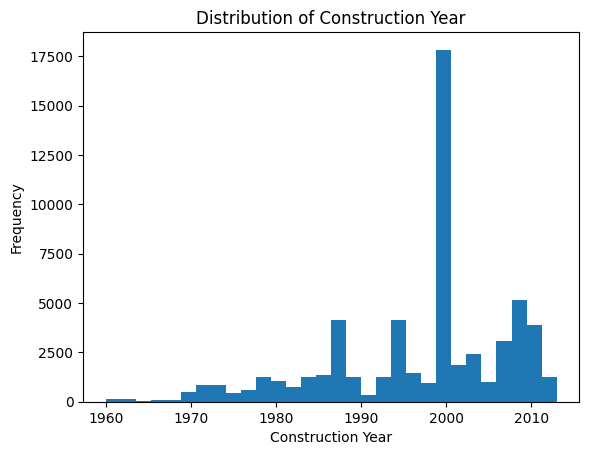

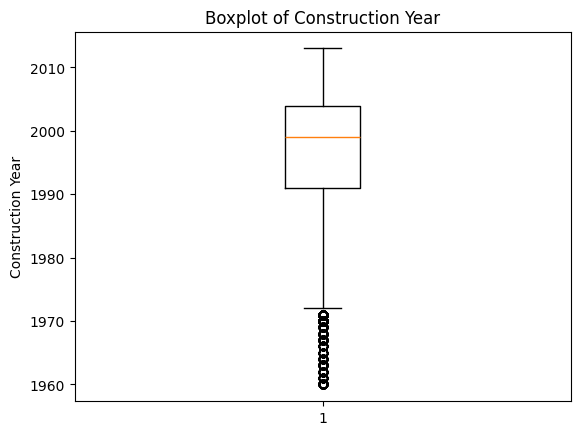

In [502]:
# 绘制 construction_year 的直方图
plt.hist(df_merge_clean['construction_year'], bins=30)
plt.title('Distribution of Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Frequency')
plt.show()

# 或使用箱线图查看
plt.boxplot(df_merge_clean['construction_year'])
plt.title('Boxplot of Construction Year')
plt.ylabel('Construction Year')
plt.show()


In [503]:
df_merge_clean.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,...,management_group,payment_type,water_quality,quantity,source,waterpoint_type,date_recorded_year,date_recorded_month,date_recorded_day,date_recorded_weekday
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,...,user-group,annually,soft,enough,spring,communal standpipe,2011,3,14,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,...,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,2013,3,6,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,...,user-group,per bucket,soft,enough,dam,communal standpipe multiple,2013,2,25,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,...,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2013,1,28,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2011,7,13,2


#### 2.3.3 population

The `population` feature in your dataset seems to have a wide range of values, from 0 to a large number, with a significant standard deviation.
Implying an uneven distribution of the population.

In [504]:
# 互信息检验 population
df_merge_clean_copy = df_merge_clean.copy(deep=True)
# 1. 对类别特征进行编码 —— LabelEncoder
for col in df_merge_clean_copy.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df_merge_clean_copy[col] = le.fit_transform(df_merge_clean_copy[col].astype(str))

# 2. 初始化一个空的字典来存储每个特征与population之间的互信息
mutual_info_scores = {}

# 3. 对于DataFrame中的每个特征，计算它与population之间的互信息
for col in df_merge_clean_copy.columns:
    if col != 'population':  # 排除自身
        # 计算互信息
        mi = mutual_info_regression(df_merge_clean_copy[[col]], df_merge_clean_copy['population'])
        mutual_info_scores[col] = mi[0]

# 4. 打印结果
for col, mi in mutual_info_scores.items():
    print(f"Mutual Information between 'population' and '{col}': {mi}")


Mutual Information between 'population' and 'id': 0
Mutual Information between 'population' and 'status_group': 0.016751893472035206
Mutual Information between 'population' and 'amount_tsh': 0.1978707069600354
Mutual Information between 'population' and 'date_recorded': 0.5348144089530065
Mutual Information between 'population' and 'funder': 0.5913819809836571
Mutual Information between 'population' and 'gps_height': 0.6100305758130418
Mutual Information between 'population' and 'installer': 0.5732070553311948
Mutual Information between 'population' and 'longitude': 0.7762044589993664
Mutual Information between 'population' and 'latitude': 0.5983858361534038
Mutual Information between 'population' and 'basin': 0.3330158310060014
Mutual Information between 'population' and 'region_code': 0.8295121347195602
Mutual Information between 'population' and 'district_code': 0.20494841790576945
Mutual Information between 'population' and 'ward': 1.125446445050124
Mutual Information between 'popu

In [505]:
# 验证是否还有缺失值
missing_count = df_merge_clean.isnull().sum()
print(missing_count)

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region_code              0
district_code            0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
date_recorded_year       0
date_recorded_month      0
date_recorded_day        0
date_recorded_weekday    0
dtype: int64


In [506]:

print(df_merge_clean.shape)
df_merge_clean

(59400, 29)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,...,management_group,payment_type,water_quality,quantity,source,waterpoint_type,date_recorded_year,date_recorded_month,date_recorded_day,date_recorded_weekday
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,...,user-group,annually,soft,enough,spring,communal standpipe,2011,3,14,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,...,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,2013,3,6,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,...,user-group,per bucket,soft,enough,dam,communal standpipe multiple,2013,2,25,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,...,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2013,1,28,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2011,7,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,...,user-group,per bucket,soft,enough,spring,communal standpipe,2013,5,3,4
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,...,user-group,annually,soft,enough,river,communal standpipe,2011,5,7,5
59397,37057,functional,0.0,2011-04-11,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,...,user-group,monthly,fluoride,enough,machine dbh,hand pump,2011,4,11,0
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Rufiji,...,user-group,never pay,soft,insufficient,shallow well,hand pump,2011,3,8,1


In [507]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   status_group           59400 non-null  object        
 2   amount_tsh             59400 non-null  float64       
 3   date_recorded          59400 non-null  datetime64[ns]
 4   funder                 59400 non-null  object        
 5   gps_height             59400 non-null  int64         
 6   installer              59400 non-null  object        
 7   longitude              59400 non-null  float64       
 8   latitude               59400 non-null  float64       
 9   basin                  59400 non-null  object        
 10  region_code            59400 non-null  int64         
 11  district_code          59400 non-null  int64         
 12  ward                   59400 non-null  object        
 13  p

In [508]:
df_merge_clean.to_csv('Backup/after_processing_data.csv')

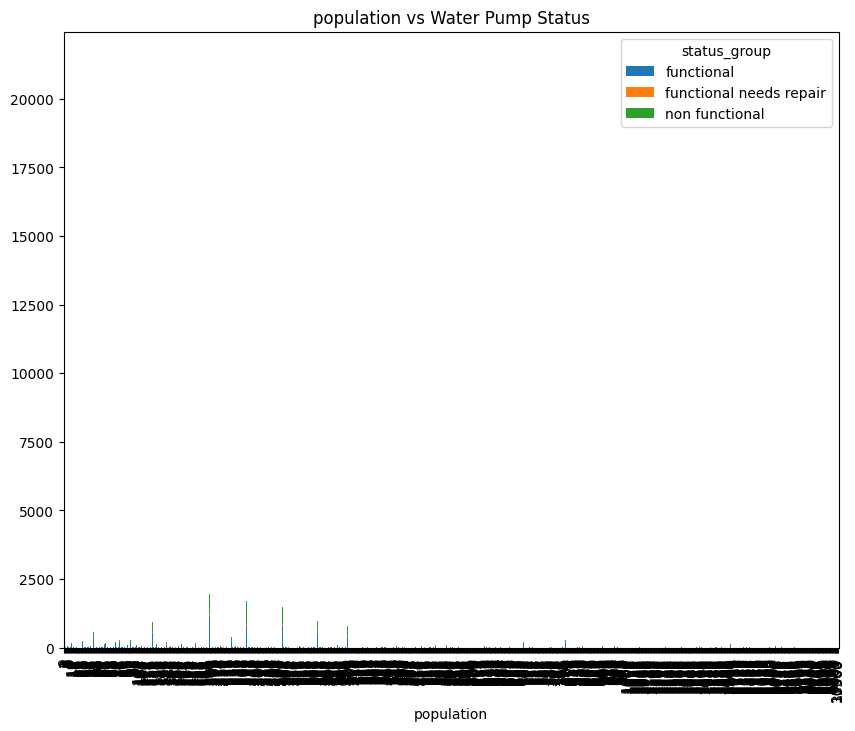

In [509]:
# 类别特征和目标变量的关系
pd.crosstab(df_merge['population'], df_merge['status_group']).plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('population vs Water Pump Status')
plt.show()

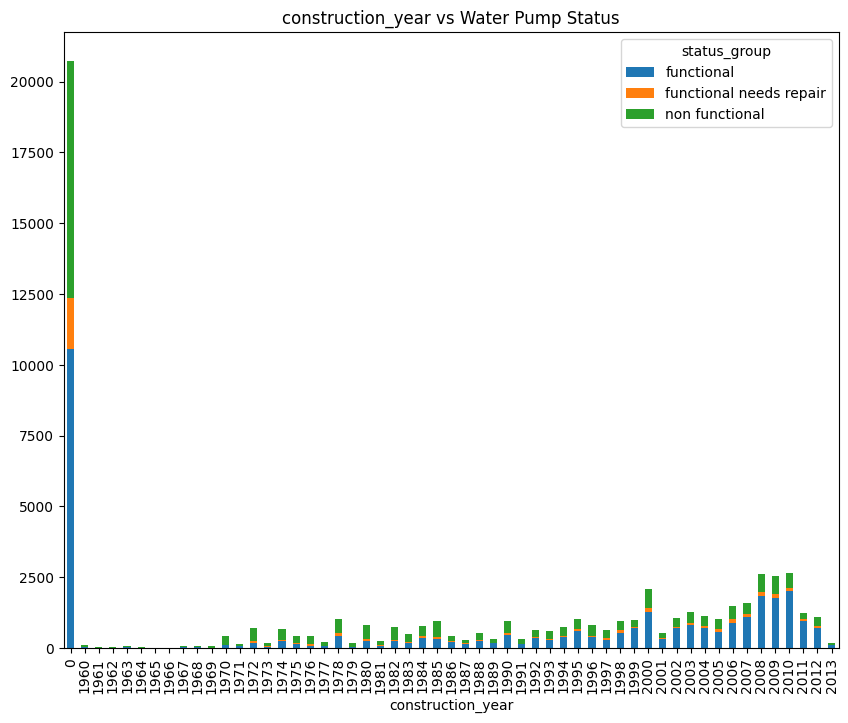

In [510]:
# 类别特征和目标变量的关系
pd.crosstab(df_merge['construction_year'], df_merge['status_group']).plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('construction_year vs Water Pump Status')
plt.show()

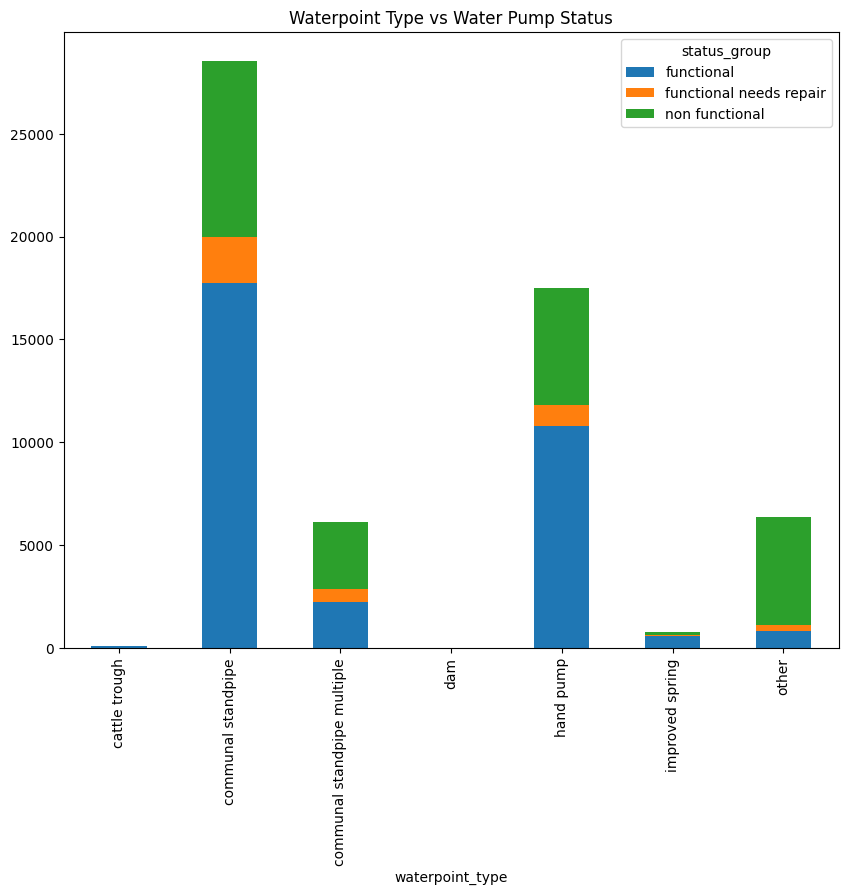

In [511]:
# 类别特征和目标变量的关系
pd.crosstab(df_merge['waterpoint_type'], df_merge['status_group']).plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Waterpoint Type vs Water Pump Status')
plt.show()

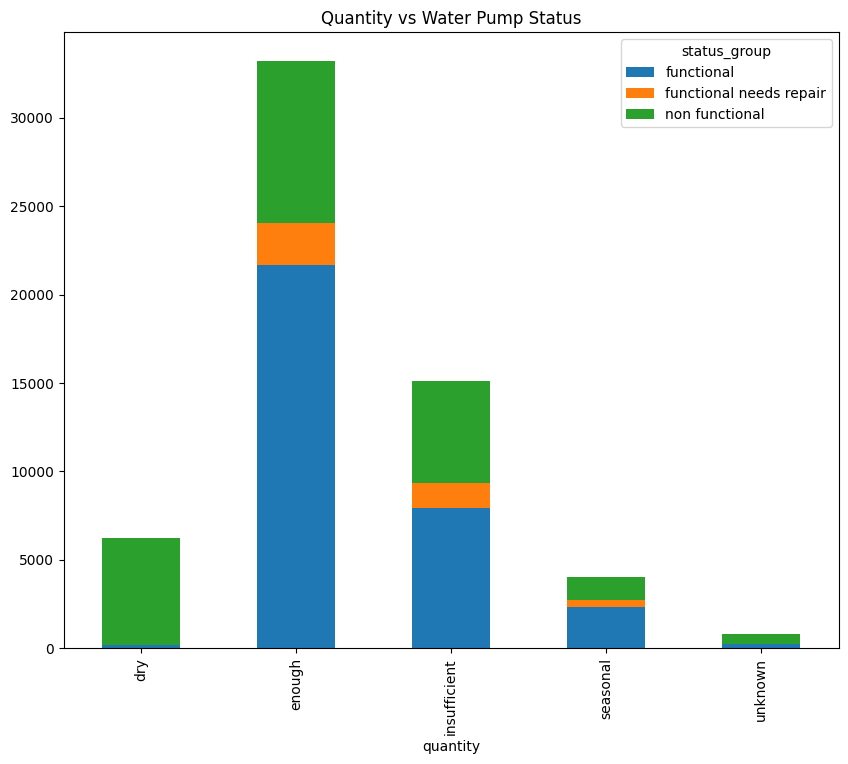

In [512]:
# 类别特征和目标变量的关系
pd.crosstab(df_merge['quantity'], df_merge['status_group']).plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Quantity vs Water Pump Status')
plt.show()

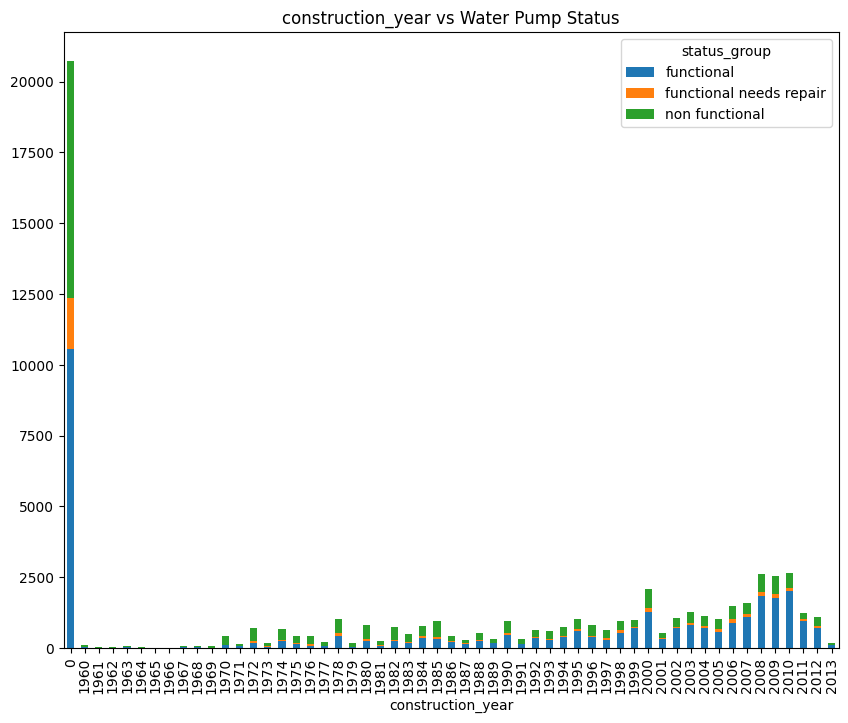

In [515]:
# 类别特征和目标变量的关系
pd.crosstab(df_merge['construction_year'], df_merge['status_group']).plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('construction_year vs Water Pump Status')
plt.show()

In [517]:
# 将所有的object bool类型转换为数值型 ———— LabelEncoder
for col in df_merge_clean.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df_merge_clean[col] = le.fit_transform(df_merge_clean[col].astype(str))

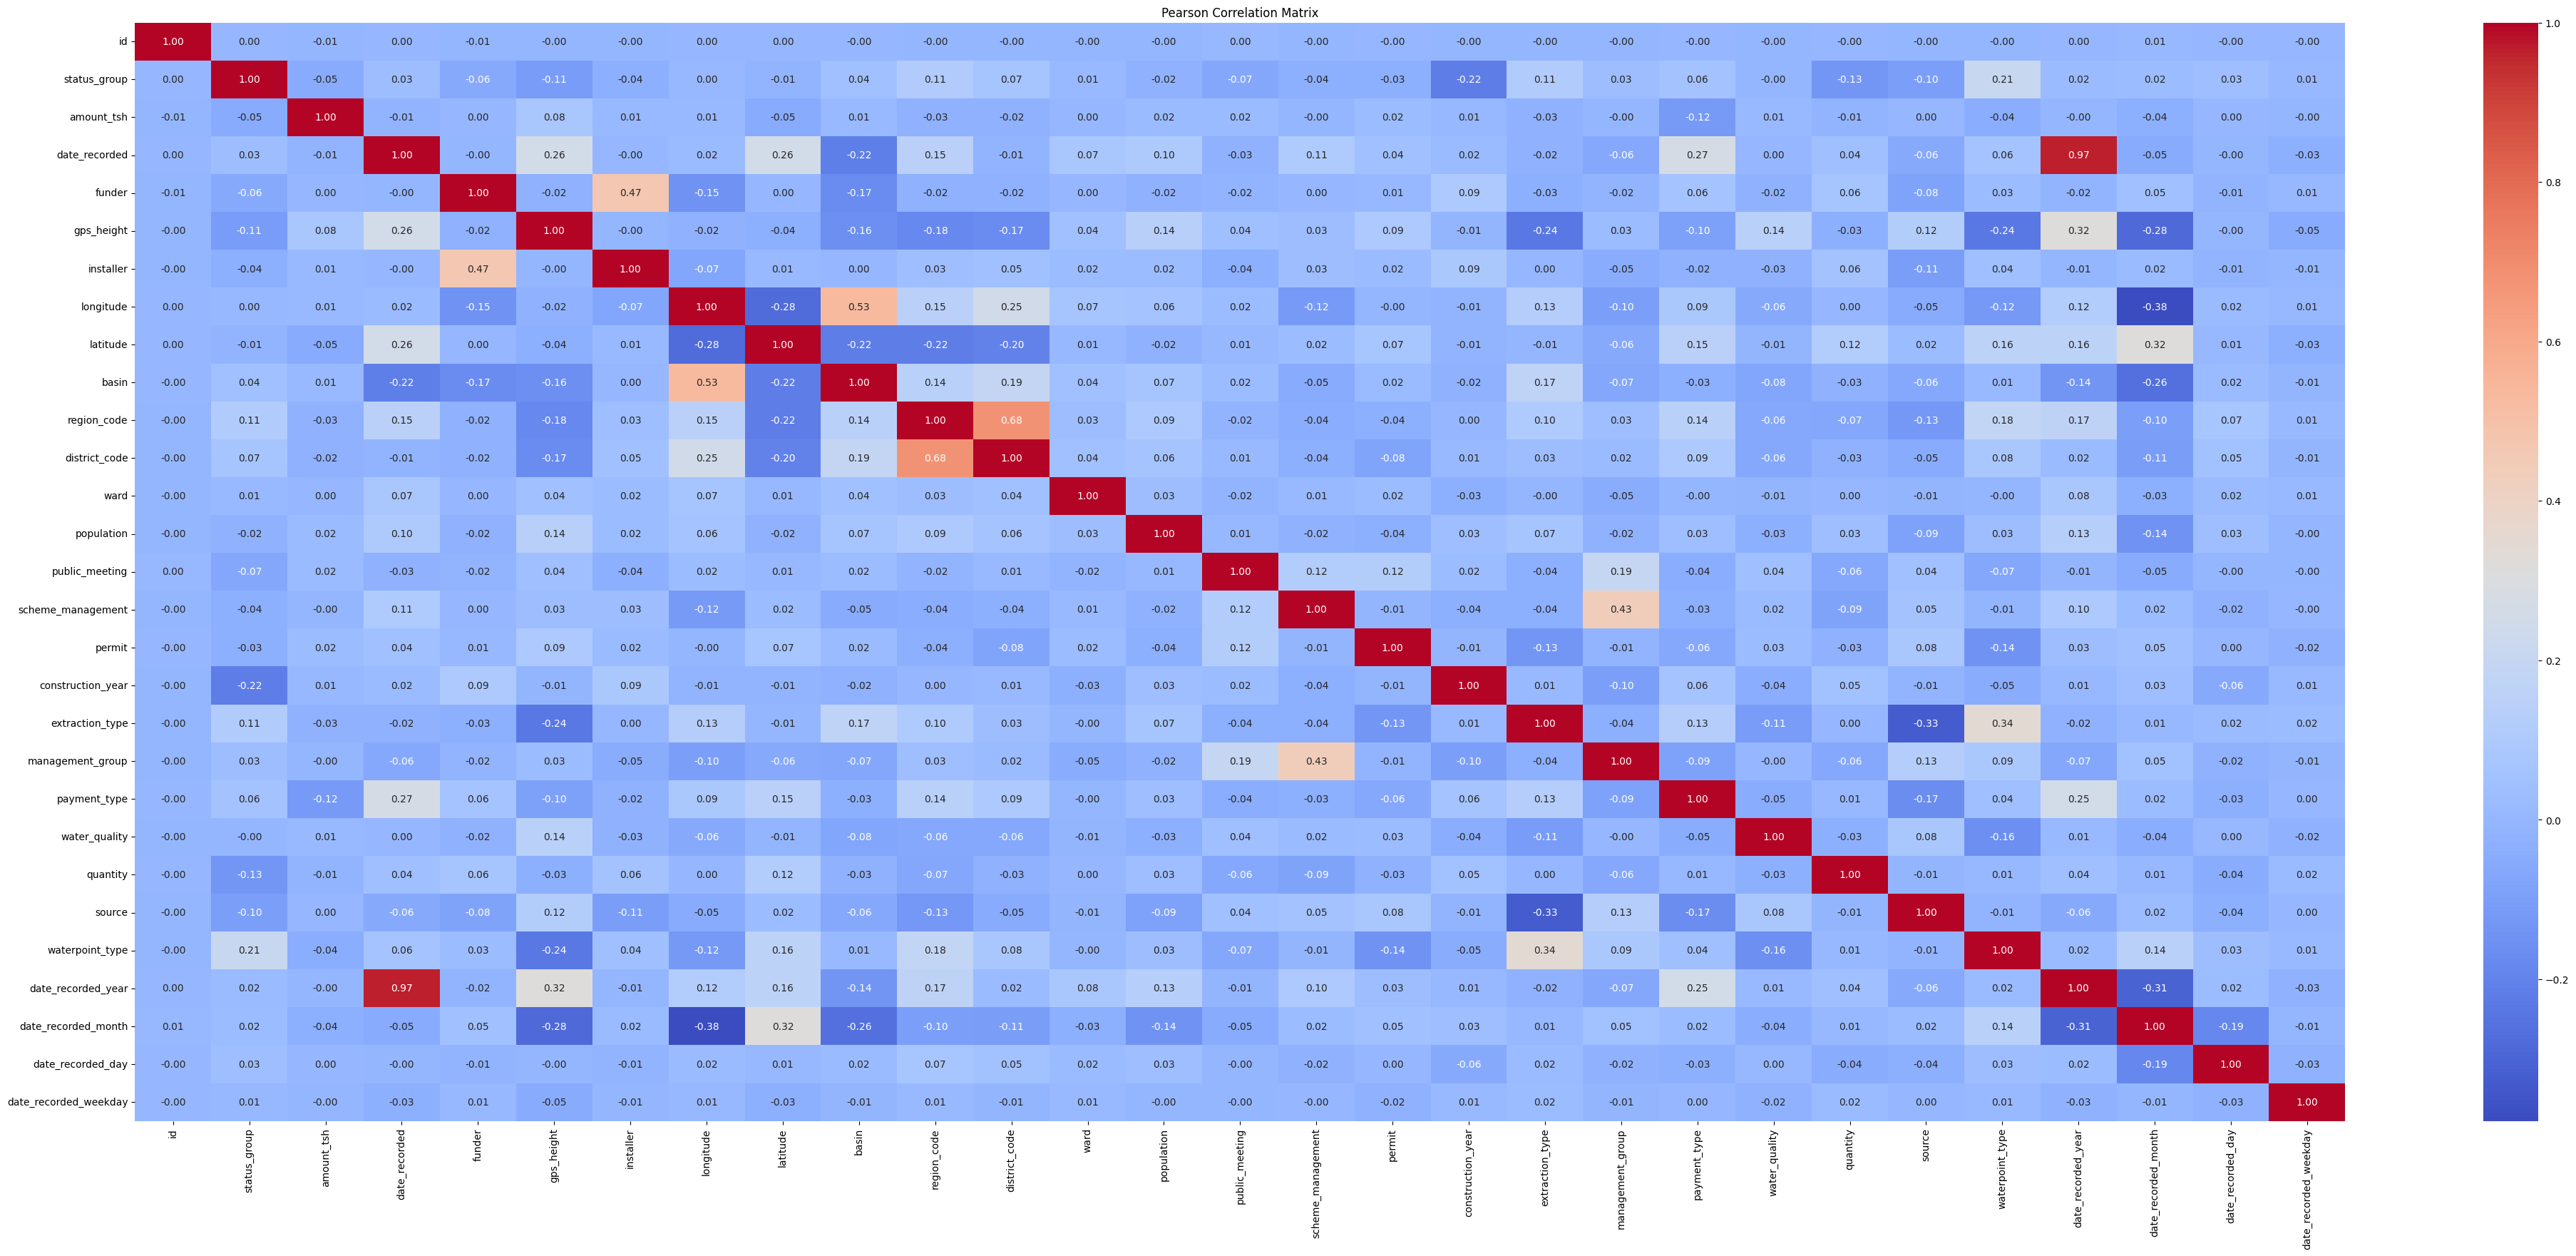

In [519]:
# 计算相关系数矩阵
correlation_matrix = df_merge_clean.corr()


# 可视化相关系数矩阵，尺寸调整为宽40英寸，高80英寸
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

In [523]:
df_merge_clean.to_csv('Backup/after_processing_LabelEncoder.csv')

### 2.4 Create new features

#### 2.4.1  pump_age

In [548]:
from datetime import datetime

# 获取当前年份
current_year = datetime.now().year

df_merge_clean['pump_age'] = current_year - df_merge_clean['construction_year']

# 查看转换结果
print(df_merge_clean[['construction_year', 'pump_age']])

       construction_year  pump_age
0                 1999.0      25.0
1                 2010.0      14.0
2                 2009.0      15.0
3                 1986.0      38.0
4                 1999.0      25.0
...                  ...       ...
59395             1999.0      25.0
59396             1996.0      28.0
59397             1995.0      29.0
59398             1987.0      37.0
59399             2002.0      22.0

[59400 rows x 2 columns]


#### 2.4.2  repaired_age

In [549]:

df_merge_clean['repaired_age'] =  df_merge_clean['date_recorded_year'] - df_merge_clean['construction_year']

# 查看转换结果
print(df_merge_clean[['repaired_age', 'date_recorded_year', 'construction_year']])

       repaired_age  date_recorded_year  construction_year
0              12.0                2011             1999.0
1               3.0                2013             2010.0
2               4.0                2013             2009.0
3              27.0                2013             1986.0
4              12.0                2011             1999.0
...             ...                 ...                ...
59395          14.0                2013             1999.0
59396          15.0                2011             1996.0
59397          16.0                2011             1995.0
59398          24.0                2011             1987.0
59399           9.0                2011             2002.0

[59400 rows x 3 columns]


In [529]:
# test
print(df_merge_clean.shape)
df_merge_clean

(59400, 30)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,...,payment_type,water_quality,quantity,source,waterpoint_type,date_recorded_year,date_recorded_month,date_recorded_day,date_recorded_weekday,pump_age
0,69572,0,6000.0,2011-03-14,1368,1390,1518,34.938093,-9.856322,1,...,0,6,1,8,1,2011,3,14,0,25.0
1,8776,0,0.0,2013-03-06,469,1399,545,34.698766,-2.147466,4,...,2,6,2,5,1,2013,3,6,2,14.0
2,34310,0,25.0,2013-02-25,825,686,2048,37.460664,-3.821329,5,...,5,6,1,0,2,2013,2,25,0,15.0
3,67743,2,0.0,2013-01-28,1740,263,1852,38.486161,-11.155298,7,...,2,6,0,3,2,2013,1,28,0,38.0
4,19728,0,0.0,2011-07-13,20,0,119,31.130847,-1.825359,4,...,2,6,3,5,1,2011,7,13,2,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,10.0,2013-05-03,436,1210,201,37.169807,-3.253847,5,...,5,6,1,8,1,2013,5,3,4,25.0
59396,27263,0,4700.0,2011-05-07,177,1212,265,35.249991,-9.070629,6,...,0,6,1,6,1,2011,5,7,5,28.0
59397,37057,0,0.0,2011-04-11,1749,0,1869,34.017087,-8.750434,6,...,1,1,1,3,4,2011,4,11,0,29.0
59398,31282,0,0.0,2011-03-08,884,0,1213,35.861315,-6.378573,6,...,2,6,2,7,4,2011,3,8,1,37.0


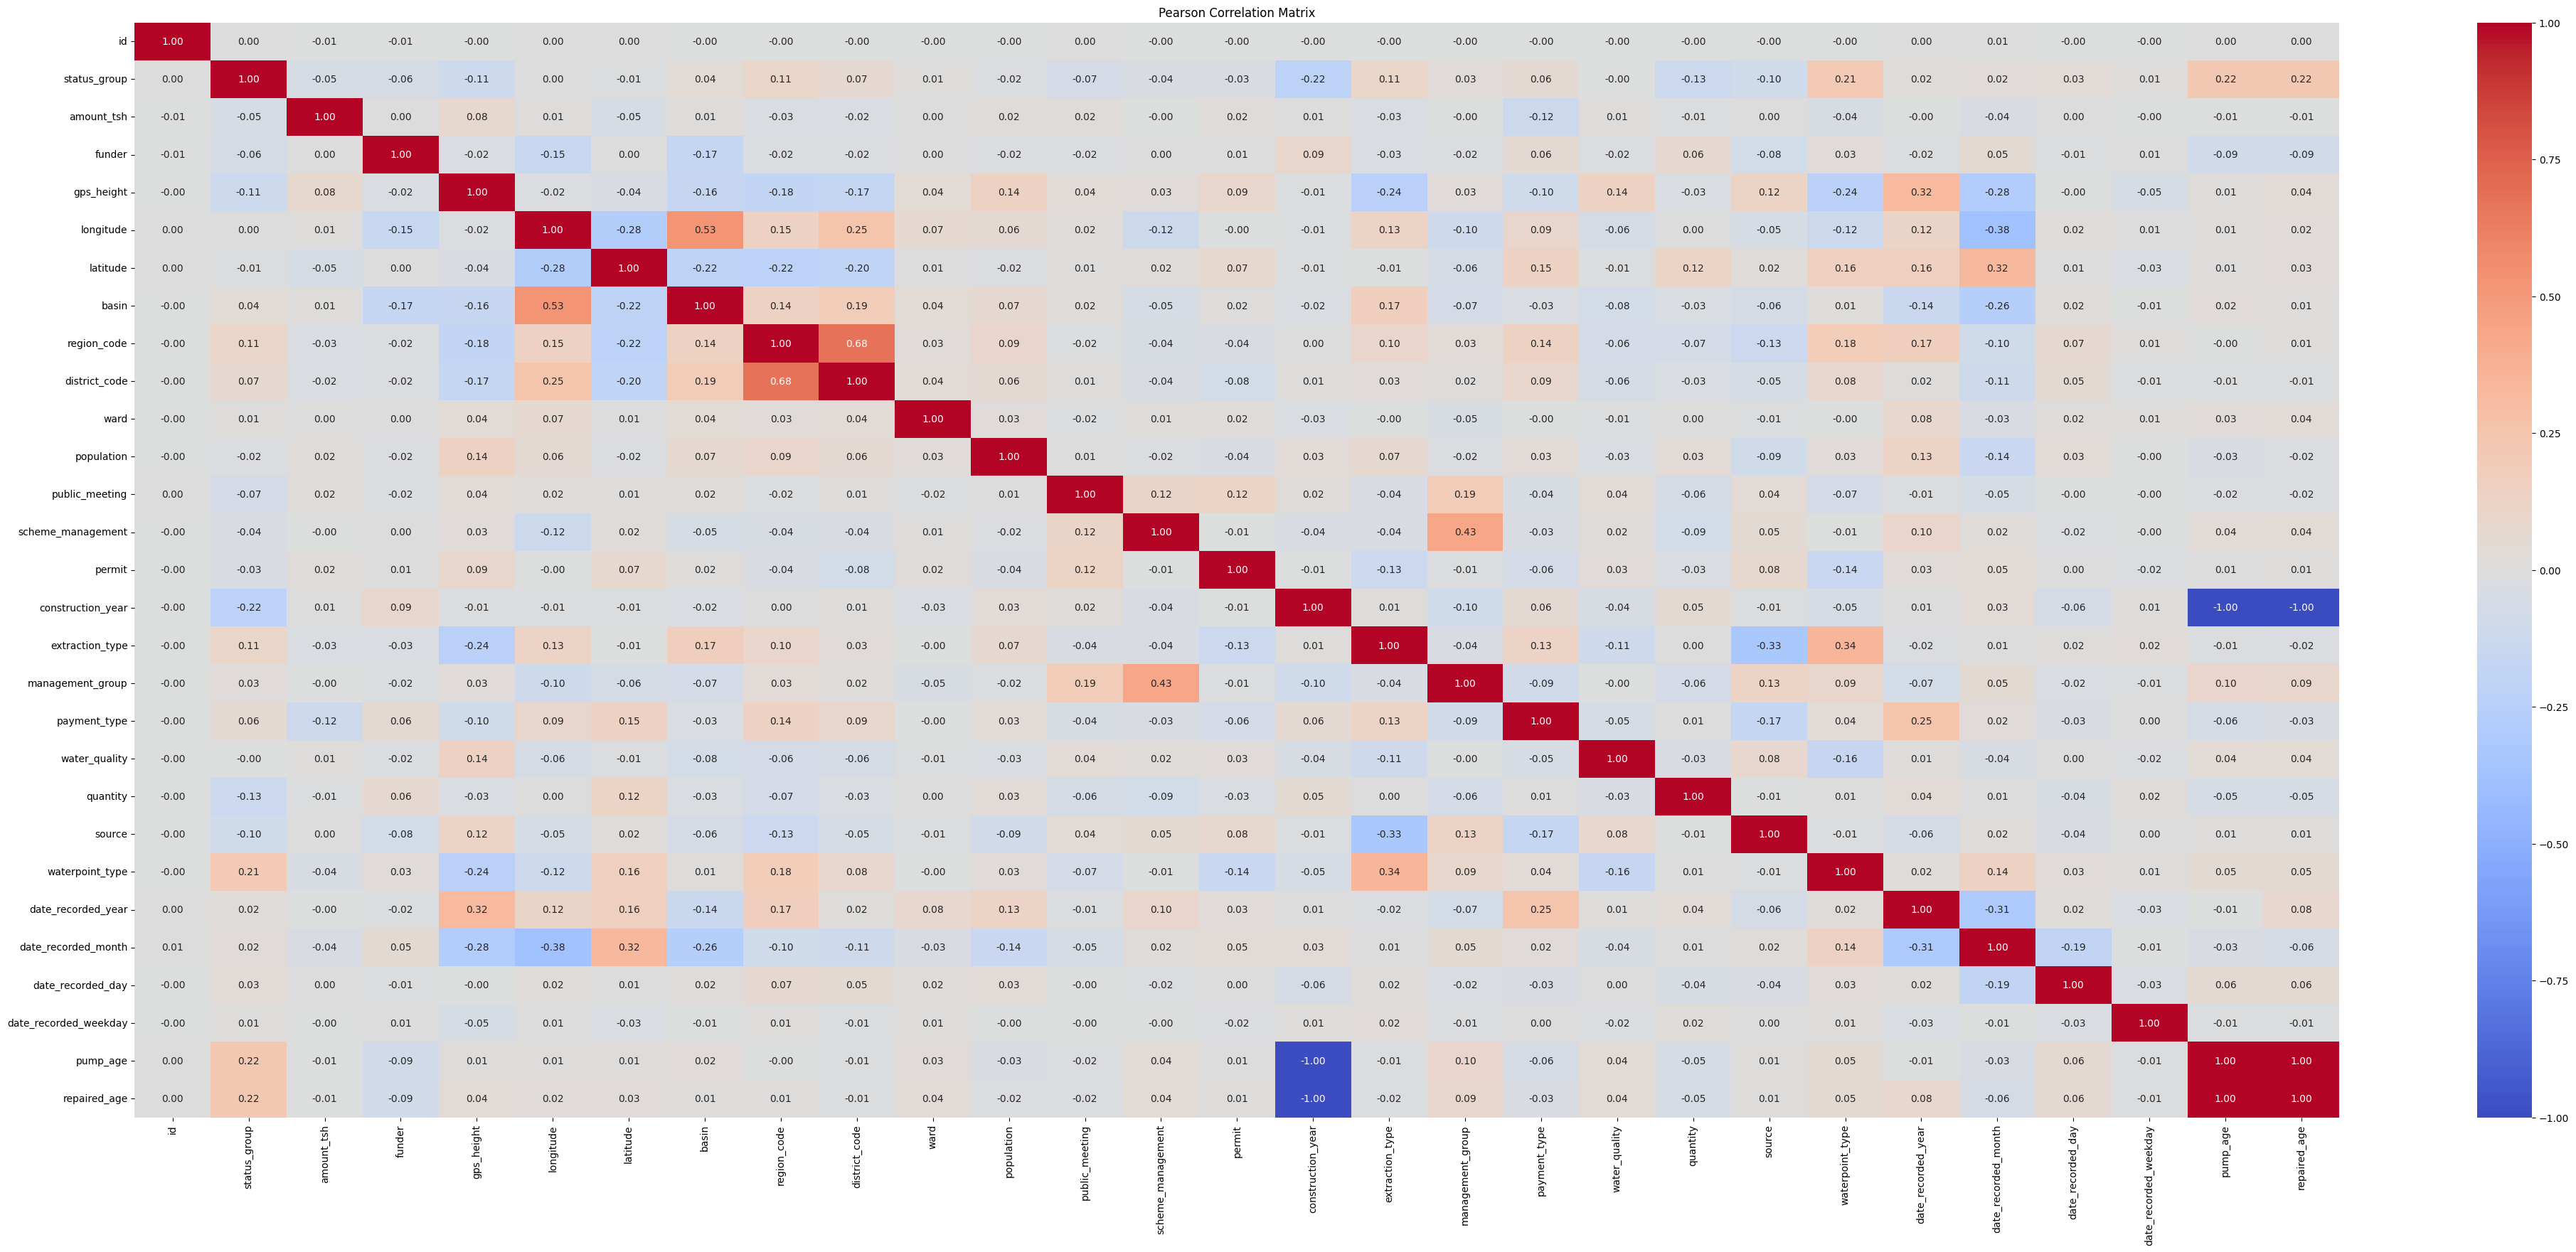

In [550]:
# 计算相关系数矩阵
correlation_matrix = df_merge_clean.corr()


# 可视化相关系数矩阵，尺寸调整为宽40英寸，高80英寸
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

根据皮尔逊相关系数矩阵分析得知以下信息：  date_recorded_year 和 payment_type的相关性系数是0.25， waterpoint_type与extraction_type的相关性系数是0.34， management_group与scheme_management的相关性系数是0.43，payment_type与date_recorded_year的相关性系数是0.25，extraction_type 与source的相关性系数是 -0.33， basin 与 date_recorded的相关性系数是 -0.22， longitude与basin的相关性系数是0.53， longitude 与 district_code 的相关性是0.25， funder 与 installer的相关性系数是0.47， gps_height 与date_recorded_year 的相关性系数是0.32，gps_height 与 date_recorded_month的相关性是-0.28， gps_height 与 date_recorded的相关性是 0.26， gps_height 与 waterpoint_type 的相关性是 -0.24 ， gps_height 与 extraction_type 的相关性是 -0.24 ，date_recorded 与 payment_type 的相关性系数是0.27， date_recorded 与 payment_type 的相关性系数是0.27，   longitude 与 date_recorded 的相关性是0.26， pump_age 与 status_group的相关性系数是0.22， status_group 与 waterpoint_type的相关性系数是0.21， status_group 与 construction_year的相关性系数是-0.22。

funder 和 installer 的相关性很高，可以去掉一个，installer去掉。

In [540]:
df_merge_clean.drop('installer', axis=1, inplace=True)

KeyError: "['installer'] not found in axis"

In [541]:
df_merge_clean.to_csv('Backup/final_processing.csv')

In [544]:
# 创建基于longitude和basin的新特征
df_merge_clean['longitude_basin'] = df_merge_clean['longitude'].astype(str) + '_' + df_merge_clean['basin']

# 创建基于gps_height和waterpoint_type的新特征
# 这里我们使用分类变量的编码和数值变量的标准化组合的一个例子
df_merge_clean['gps_height_waterpoint'] = df_merge_clean['gps_height'].astype(str) + '_' + df_merge_clean['waterpoint_type'].astype(str)



TypeError: can only concatenate str (not "int") to str

In [556]:
features_to_drop = ['date_recorded']
df_merge_clean.drop(features_to_drop, axis=1, inplace=True)


KeyError: "['date_recorded'] not found in axis"

## 3. 特征缩放 —— StandardScaler

In [551]:
from sklearn.preprocessing import StandardScaler

# 假设df是你的数据集DataFrame，并且所有的特征都需要进行标准化处理
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_merge_clean)

# 转换回DataFrame格式，便于后续操作
df_scaled = pd.DataFrame(scaled_features, columns=df_merge_clean.columns)

# 查看标准化后的数据
print(df_scaled.head())


         id  status_group  amount_tsh    funder  gps_height  longitude  \
0  1.512933     -0.885633    1.895665  0.798553    1.041252  -0.082411   
1 -1.320990     -0.885633   -0.105970 -0.704747    1.054237  -0.175631   
2 -0.130757     -0.885633   -0.097630 -0.109447    0.025541   0.900156   
3  1.427676      1.220105   -0.105970  1.420609   -0.584751   1.299597   
4 -0.810478     -0.885633   -0.105970 -1.455561   -0.964200  -1.565372   

   latitude     basin  region_code  district_code  ...  water_quality  \
0 -1.408791 -1.244276    -0.244325      -0.065370  ...       0.272762   
1  1.207934 -0.031205     0.267409      -0.376781  ...       0.272762   
2  0.639751  0.373152     0.324269      -0.169174  ...       0.272762   
3 -1.849720  1.181867     4.247564       5.955245  ...       0.272762   
4  1.317271 -0.031205     0.153691      -0.480585  ...       0.272762   

   quantity    source  waterpoint_type  date_recorded_year  \
0 -0.405301  0.955427        -0.883614           -0.96

In [552]:
df_merge_clean.to_csv('Backup/final_processing_StandardScaler.csv')

## 4. PCA

In [554]:
from sklearn.decomposition import PCA
# 初始化PCA，选择主成分的数量，例如选择保留95%的方差
pca = PCA(n_components=0.95)

# 应用PCA
principal_components = pca.fit_transform(scaled_features)

# 将主成分转换回DataFrame格式，便于后续操作
df_pca = pd.DataFrame(data=principal_components)

# 查看PCA结果
print(df_pca.head())

# 打印解释的方差比例
print(pca.explained_variance_ratio_)

         0         1         2         3         4         5         6   \
0 -0.594668 -1.127706  1.928270 -1.384791 -0.021860 -0.582543  2.392384   
1 -2.341045 -0.325664  1.413194  1.628512 -0.689698 -0.743182 -0.988124   
2 -1.854207  1.276396  0.858906  1.657536  0.875066  0.649860 -0.777916   
3  2.619337  6.456180  0.124900 -1.016008  2.746603 -2.977959  0.673400   
4 -0.984135 -1.296384 -0.633130  0.669676 -2.163223 -1.275963 -1.376679   

         7         8         9   ...        14        15        16        17  \
0  0.420172  0.158877  0.251090  ... -0.018417  0.433443 -0.004933 -1.524832   
1  0.298874  0.863286  0.300713  ...  0.906264 -0.364054 -0.412785 -0.496977   
2 -1.202303 -0.622670  1.645090  ...  0.338500  0.561883  1.033411  0.502122   
3 -1.266633 -0.578278  2.402068  ...  0.381612  0.184189 -0.581281  0.422673   
4  0.773716  0.911315  0.856448  ...  1.653934  0.752041  1.085736  0.403594   

         18        19        20        21        22        23  
0 -0

In [555]:
df_merge_clean.to_csv('Backup/final_processing_PCA.csv')

## 5. 模型训练

### 5.1 随机森林

In [559]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 假设数据集df已经加载，且最后一列是目标变量
X = df_merge_clean.drop('status_group', axis=1)  # 特征数据
y = df_merge_clean['status_group']  # 目标变量

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [562]:
# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [564]:
# 预测测试集结果
y_pred = rf_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 80.88%


In [565]:
df_PCA = pd.read_csv('Backup/final_processing_PCA.csv')
df_StandardScaler = pd.read_csv('Backup/final_processing_StandardScaler.csv')
df_final = pd.read_csv('Backup/final_processing.csv')
df_after_processing = pd.read_csv('Backup/after_processing_LabelEncoder.csv')
df_after_processing_object = pd.read_csv('Backup/after_filling_massing.csv')
df_after_filling_object = pd.read_csv('Backup/after_filling_massing.csv')
df_undisposed_object = pd.read_csv('Backup/deleted_data.csv')

df_final_del = df_final.drop('date_recorded', axis=1, inplace=True)

In [566]:
# 假设数据集df已经加载，且最后一列是目标变量
X = df_StandardScaler.drop('status_group', axis=1)  # 特征数据
y = df_StandardScaler['status_group']  # 目标变量

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [569]:
# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [570]:
# 预测测试集结果
y_pred = rf_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 81.07%


In [583]:
# 假设数据集df已经加载，且最后一列是目标变量
X = df_PCA.drop(['status_group'], axis=1)  # 特征数据
y = df_PCA['status_group']  # 目标变量

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [585]:
# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [586]:
# 预测测试集结果
y_pred = rf_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 81.07%


### 5.2 决策树 —— DecisionTree

In [588]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [590]:
# 假设数据集df已经加载，且最后一列是目标变量
X = df_final.drop('status_group', axis=1)  # 特征数据
y = df_final['status_group']  # 目标变量

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [592]:
# 初始化决策树分类器
dt_classifier = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [593]:
# 预测测试集结果
y_pred = dt_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 73.91%


In [594]:
# 假设数据集df已经加载，且最后一列是目标变量
X = df_StandardScaler.drop('status_group', axis=1)  # 特征数据
y = df_StandardScaler['status_group']  # 目标变量

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [596]:
# 初始化决策树分类器
dt_classifier = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [597]:
# 预测测试集结果
y_pred = dt_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 73.70%


In [ ]:

# 假设数据集df_PCA已经加载，且最后一列是目标变量
X = df_PCA.drop('status_group', axis=1)  # 特征数据
y = df_PCA['status_group']  # 目标变量

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [599]:
# 初始化决策树分类器
dt_classifier = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [602]:
# 预测测试集结果
y_pred = dt_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 73.70%


### 5.3  ANN

In [608]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [609]:
# 假设数据集df_PCA已经加载，且最后一列是目标变量
X = df_PCA.drop('status_group', axis=1)  # 特征数据
y = df_PCA['status_group']  # 目标变量

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [611]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 使用sigmoid激活函数适用于二分类问题
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [612]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
1485/1485 [==============================] - 1s 498us/step - loss: -1332.6100 - accuracy: 0.2134 - val_loss: -5631.5518 - val_accuracy: 0.2614
Epoch 2/50
1485/1485 [==============================] - 1s 463us/step - loss: -18546.3633 - accuracy: 0.2309 - val_loss: -38180.7500 - val_accuracy: 0.2669
Epoch 3/50
1485/1485 [==============================] - 1s 482us/step - loss: -68002.8281 - accuracy: 0.2343 - val_loss: -108550.4609 - val_accuracy: 0.2686
Epoch 4/50
1485/1485 [==============================] - 1s 442us/step - loss: -156754.5156 - accuracy: 0.2254 - val_loss: -221960.1719 - val_accuracy: 0.2276
Epoch 5/50
1485/1485 [==============================] - 1s 463us/step - loss: -290727.2500 - accuracy: 0.2240 - val_loss: -385260.8750 - val_accuracy: 0.2212
Epoch 6/50
1485/1485 [==============================] - 1s 463us/step - loss: -477418.8438 - accuracy: 0.2233 - val_loss: -605700.0625 - val_accuracy: 0.3458
Epoch 7/50
1485/1485 [==============================] - 1s 

In [613]:
# 使用测试集评估模型性能
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


372/372 [==============================] - 0s 283us/step - loss: -158161456.0000 - accuracy: 0.2294
Model Accuracy: 22.94%


In [614]:
# 假设数据集df_PCA已经加载，且最后一列是目标变量
X = df_StandardScaler.drop('status_group', axis=1)  # 特征数据
y = df_StandardScaler['status_group']  # 目标变量

In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [616]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 使用sigmoid激活函数适用于二分类问题
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [617]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
1485/1485 [==============================] - 1s 494us/step - loss: -1065.9348 - accuracy: 0.2357 - val_loss: -4545.8770 - val_accuracy: 0.2200
Epoch 2/50
1485/1485 [==============================] - 1s 465us/step - loss: -14880.2168 - accuracy: 0.2162 - val_loss: -30654.1680 - val_accuracy: 0.2051
Epoch 3/50
1485/1485 [==============================] - 1s 451us/step - loss: -53648.6133 - accuracy: 0.2130 - val_loss: -85034.9688 - val_accuracy: 0.2229
Epoch 4/50
1485/1485 [==============================] - 1s 454us/step - loss: -122449.6797 - accuracy: 0.2202 - val_loss: -173329.9688 - val_accuracy: 0.2072
Epoch 5/50
1485/1485 [==============================] - 1s 452us/step - loss: -228432.6406 - accuracy: 0.2206 - val_loss: -302833.9375 - val_accuracy: 0.2109
Epoch 6/50
1485/1485 [==============================] - 1s 463us/step - loss: -375325.2188 - accuracy: 0.2231 - val_loss: -476594.6875 - val_accuracy: 0.2402
Epoch 7/50
1485/1485 [==============================] - 1s 4

In [631]:
# 使用测试集评估模型性能
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

372/372 [==============================] - 0s 279us/step - loss: -125886792.0000 - accuracy: 0.2055
Model Accuracy: 20.55%


In [634]:
# ANN
from sklearn.neural_network import MLPClassifier
import pandas as pd

data_train_pca = pd.read_csv('Backup/final_processing_PCA.csv')
data_train_scaling = pd.read_csv('Backup/final_processing_StandardScaler.csv')
df_pump_encoded = pd.read_csv('Backup/final_processing.csv')
df_pump_encoded = df_pump_encoded.drop('date_recorded', axis=1)


data_train_imputation = df_pump_encoded.drop('status_group', axis=1)
data_target = df_pump_encoded['status_group']

# Split the dataset into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    data_train_pca, data_target, test_size=0.2, random_state=42
)
X_train_imputation, X_test_imputation, y_train_imputation, y_test_imputation = train_test_split(
    data_train_imputation, data_target, test_size=0.2, random_state=42
)
X_train_scaling, X_test_scaling, y_train_scaling, y_test_scaling = train_test_split(
    data_train_scaling, data_target, test_size=0.2, random_state=42
)

# Train a ANN model
model_pca = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca, y_train_pca)
model_imputation = MLPClassifier(random_state=1, max_iter=300).fit(X_train_imputation, y_train_imputation)
model_scaling = MLPClassifier(random_state=1, max_iter=300).fit(X_train_scaling, y_train_scaling)

accuracy_pca = model_pca.score(X_test_pca, y_test_pca)
accuracy_imputation = model_imputation.score(X_test_imputation, y_test_imputation)
accuracy_scaling = model_scaling.score(X_test_scaling, y_test_scaling)
print(f"ANN accuracy using PCA: {accuracy_pca}")
print(f"ANN accuracy using imputation: {accuracy_imputation}")
print(f"ANN accuracy using scaling: {accuracy_scaling}")

ANN accuracy using PCA: 0.7345117845117846
ANN accuracy using imputation: 0.5518518518518518
ANN accuracy using scaling: 0.7345117845117846


### 5.4 梯度提升机 - Gradient Boosting Machines

In [621]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier  # 对于分类问题
from sklearn.metrics import accuracy_score


In [622]:
# 假设数据集df_StandardScaler已经加载，且最后一列是目标变量
X = df_StandardScaler.drop('status_group', axis=1)  # 特征数据
y = df_StandardScaler['status_group']  # 目标变量

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [624]:
# 初始化梯度提升机分类器
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 训练模型
gbm_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [625]:
# 预测测试集结果
y_pred = gbm_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 74.68%


In [626]:
# 假设数据集df_PCA已经加载，且最后一列是目标变量
X = df_PCA.drop('status_group', axis=1)  # 特征数据
y = df_PCA['status_group']  # 目标变量

In [627]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [628]:
# 初始化梯度提升机分类器
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 训练模型
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [629]:
# 预测测试集结果
y_pred = gbm_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 74.68%


In [640]:
# 假设数据集df_final已经加载，且最后一列是目标变量
X = df_after_processing.drop(['status_group', 'date_recorded'], axis=1)  # 特征数据
y = df_after_processing['status_group']  # 目标变量

In [641]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [642]:
# 初始化梯度提升机分类器
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 训练模型
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [643]:
# 预测测试集结果
y_pred = gbm_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 74.88%


#### Saving the dataset after cleanup

After doing all this cleanup work on the dataset, saving it is usually a smart thing to do:

In [601]:
df_penguins.to_csv('penguins_modified_CLEAN.csv')

NameError: name 'df_penguins' is not defined

### 1.5 Normalisation

It can be useful to normalise data, for example to understand better where a point is situated within a distribution.

#### Min-max normalisation

$$
\frac{X - X_{min}}{X_{max}-X_{min}}
$$

Let's min-max normalise the flipper length:

In [299]:
df_penguins['flipper_length_mm'] = (
    (df_penguins['flipper_length_mm']-df_penguins['flipper_length_mm'].min()) /
    (df_penguins['flipper_length_mm'].max()-df_penguins['flipper_length_mm'].min()))
df_penguins

NameError: name 'df_penguins' is not defined

#### Standard score

$$
\frac{X - \mu}{\sigma}
$$

Let's standardise the body mass:

In [ ]:
df_penguins['body_mass_g'] = (
    (df_penguins['body_mass_g']-df_penguins['body_mass_g'].mean()) /
    df_penguins['body_mass_g'].std())
df_penguins

---

## 2. Analyse ourselves dataset

In this section you will be tasked to work on the dataset collected during this module (`DSML 2024 - Let's Analyse Ourselves(1-164).xlsx`), it can be found on Moodle. You will find below tasks that will guide you for the analysis of this dataset.

In [ ]:
df = pd.read_excel("DSML 2024 - Let's Analyse Ourselves(1-164).xlsx", index_col=0)
df

> **Note about time series and dates**: You can notice that two columns consist of time / date type of values. In our case they are automatically detected by the reading function, however you can convert data into time series / date with the `pd.to_datetime()` function. This is very important that they are recognised as such because otherwise, operations on them will not make sense. Once they are properly recognised, operations such as addition and subtractions on those time / date values will take their data type into account.

In [ ]:
df.info()

**Task 2.1**: Using the start and completion times, create a new column that contains the completion duration of the form.

**Task 2.2**: Some columns in this dataset are not very useful since our dataset is anonymous (email and name), delete them from the table.

**Task 2.3**: For convenience later on, use the [`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) method to rename the long column names.

**Task 2.4**: Explore the dataset by printing informations about each column using the `describe()` method. For categorical columns, also print all the unique values.

**Task 2.5**: Use the techniques seen before to identify and eventually correct duplicates, if any.

**Task 2.6**: Use the techniques seen before to identify and eventually correct outliers, if any. For this purpose **think of what are realistic values for each column** (including the new completion duration column you created). Depending on the extent of incoherence of values, take a decision on a case to case basis of either:
- replacing the value by another value
- replacing the values by *Nan*
- dropping the whole row

**Task 2.7**: Use the techniques seen before to identify and eventually correct appropriately missing data, if any.

**Task 2.8**: Create a new column with the standardised sleep time (standard score).

**Task 2.9**: Save the cleaned up table in a file.

---

## 3. Further tasks

**Task 1**: Create your own simple research question about this dataset. Research questions could include:
- Are cat lovers more optimistic about the future?
- Were people with less sleep more tired the day of answering the questionnaire?
- ...

**Task 2**: Answer your research question using the techniques seen in this lab and the previous one.

---

## 4. Open tasks using the survey data sets

**Open task 1**: Load the dataset with questionnaire's answers from previous years' classes (`DMA 2023 - Lets Analyse Ourselves(1-206).xlsx`, and `DMA 2022 - Lets Analyse Ourselves(1-140).xlsx` ). Please note that due to a module name change (from DMA to DSML) one of the column headings is different to this year. 

**Open task 2**: Compare the results of this year to those of the previous years - have there been any 'significant' changes? This is a good opportunity to try out box plots (`DMA 2023 - Let's Analyse Ourselves(1-206).xlsx`) and (`DMA 2022 - Lets Analyse Ourselves(1-140).xlsx`).

## 5. Starting with Signal Data Preprocessing

**Open task 1**: Collect some gesture data from the [phyphox app](https://phyphox.org/) on your phone as shown in the Week 2 Lecture. Do each gesture continuously for 15 repetitions and email a CSV file with the data to yourself - Use the Export data option from the top right hand side menu list. Please use the Acceleration (without g) option. For a bigger dataset, you can repeat this 5 to 10 times. Start each recording from the phone on a flat table and return to this position before stopping the recording. This is just to make your life easier when it comes to cleaning the data. 

The gestures are: 
- Moving your phone in a circle
- Waving your phone
- Gesturing "come here" with your phone
- Gesturing "go away" with your phone
you are free to make up another few of your own.

Load the CSV data files and visualise the data. 

So this is a good opportunity to get familiar with another important package - [matplotlib](https://matplotlib.org/stable/index.html) We will be using it a lot for the tutorial next week which is on visualisation. 
You can start to play around with it this week. 

Use a simple line [plot](https://matplotlib.org/stable/plot_types/basic/plot.html#) to display each of the columns, with Time on the x axis. Use a different colour for each x, y and z column. Note, the last column is the Absolute acceleration. 

You will see some movement artefacts at the start and end of the final. Do you think you should keep these or discard these sections of the signal? To decide, consider a possible use case scenario for this type of data - it might be for a user to gesticulate to a robot for example. 
